In [55]:
import pandas as pd
pd.set_option('display.max_columns',50)
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
plates = pd.read_csv('surface_faults.csv')
plates

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,1360,0,1,40,0.3662,0.3906,0.5714,0.0206,0.5185,0.7273,0.0,2.4362,1.4472,1.2041,-0.4286,0.0026,0.7254,0,0,0,0,0,0,1
1937,144,175,340581,340598,287,44,24,34599,112,133,1360,0,1,40,0.2118,0.4554,0.5484,0.0228,0.7046,0.7083,0.0,2.4579,1.4914,1.2305,-0.4516,-0.0582,0.8173,0,0,0,0,0,0,1
1938,145,174,386779,386794,292,40,22,37572,120,140,1360,0,1,40,0.2132,0.3287,0.5172,0.0213,0.7250,0.6818,0.0,2.4654,1.4624,1.1761,-0.4828,0.0052,0.7079,0,0,0,0,0,0,1
1939,137,170,422497,422528,419,97,47,52715,117,140,1360,0,1,40,0.2015,0.5904,0.9394,0.0243,0.3402,0.6596,0.0,2.6222,1.5185,1.4914,-0.0606,-0.0171,0.9919,0,0,0,0,0,0,1


In [57]:
plates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
X_Minimum                1941 non-null int64
X_Maximum                1941 non-null int64
Y_Minimum                1941 non-null int64
Y_Maximum                1941 non-null int64
Pixels_Areas             1941 non-null int64
X_Perimeter              1941 non-null int64
Y_Perimeter              1941 non-null int64
Sum_of_Luminosity        1941 non-null int64
Minimum_of_Luminosity    1941 non-null int64
Maximum_of_Luminosity    1941 non-null int64
Length_of_Conveyer       1941 non-null int64
TypeOfSteel_A300         1941 non-null int64
TypeOfSteel_A400         1941 non-null int64
Steel_Plate_Thickness    1941 non-null int64
Edges_Index              1941 non-null float64
Empty_Index              1941 non-null float64
Square_Index             1941 non-null float64
Outside_X_Index          1941 non-null float64
Edges_X_Index            1941 non-null float64
Edges_Y_Index            194

In [58]:
X = plates.drop(labels = ['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults'],axis =1)
y = plates[['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults']]

In [59]:
pd.value_counts(y.sum(axis=1))

1    1941
dtype: int64

In [60]:
X

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150
3,853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,1360,0,1,40,0.3662,0.3906,0.5714,0.0206,0.5185,0.7273,0.0,2.4362,1.4472,1.2041,-0.4286,0.0026,0.7254
1937,144,175,340581,340598,287,44,24,34599,112,133,1360,0,1,40,0.2118,0.4554,0.5484,0.0228,0.7046,0.7083,0.0,2.4579,1.4914,1.2305,-0.4516,-0.0582,0.8173
1938,145,174,386779,386794,292,40,22,37572,120,140,1360,0,1,40,0.2132,0.3287,0.5172,0.0213,0.7250,0.6818,0.0,2.4654,1.4624,1.1761,-0.4828,0.0052,0.7079
1939,137,170,422497,422528,419,97,47,52715,117,140,1360,0,1,40,0.2015,0.5904,0.9394,0.0243,0.3402,0.6596,0.0,2.6222,1.5185,1.4914,-0.0606,-0.0171,0.9919


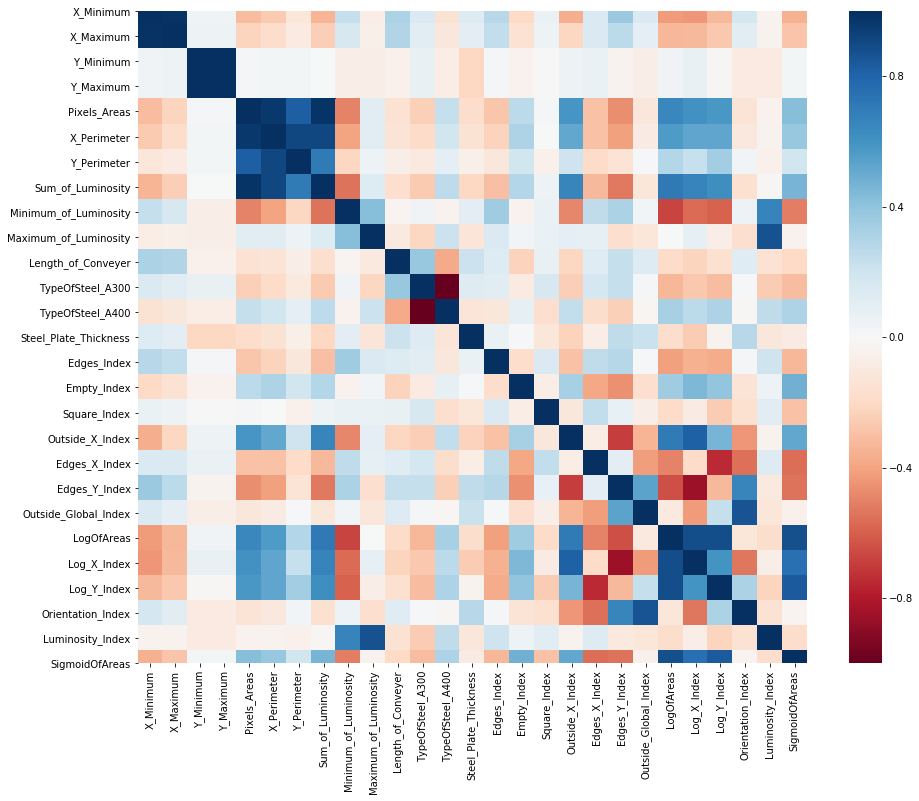

In [61]:
#col_map = kwargs.get('color_palette', sns.light_palette('orange', n_colors=3, as_cmap=False))
plt.figure(figsize=(15,12))
sns.heatmap(X.corr(),cmap='RdBu')

Text(0.5, 1.01, 'Dirtiness Vs X')

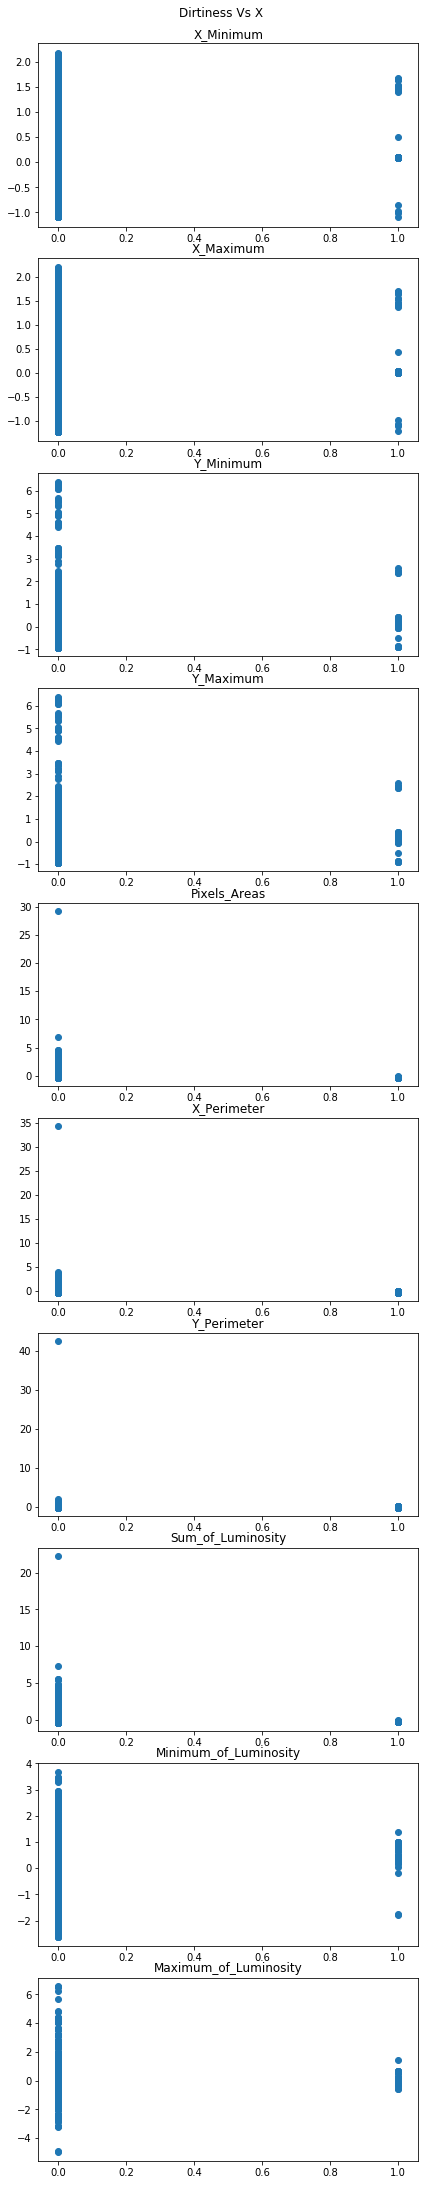

In [703]:
fig, axs = plt.subplots(ncols=1,nrows=10,figsize=(6,30))
axs = axs.flatten()
fig.tight_layout()
for ax,col in zip(axs,X_scaled.columns[:10]):
    ax.scatter(y[y.columns[4]],X_scaled[col])
    ax.set_title(col)
    
plt.suptitle('{} Vs X'.format(y.columns[4]),y=1.01)

In [62]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
X_Minimum,1941.0,5.711360e+02,5.206907e+02,0.0000,51.0000,4.350000e+02,1.053000e+03,1.705000e+03
X_Maximum,1941.0,6.179645e+02,4.976274e+02,4.0000,192.0000,4.670000e+02,1.072000e+03,1.713000e+03
Y_Minimum,1941.0,1.650685e+06,1.774578e+06,6712.0000,471253.0000,1.204128e+06,2.183073e+06,1.298766e+07
Y_Maximum,1941.0,1.650739e+06,1.774590e+06,6724.0000,471281.0000,1.204136e+06,2.183084e+06,1.298769e+07
Pixels_Areas,1941.0,1.893878e+03,5.168460e+03,2.0000,84.0000,1.740000e+02,8.220000e+02,1.526550e+05
X_Perimeter,1941.0,1.118552e+02,3.012092e+02,2.0000,15.0000,2.600000e+01,8.400000e+01,1.044900e+04
Y_Perimeter,1941.0,8.296600e+01,4.264829e+02,1.0000,13.0000,2.500000e+01,8.300000e+01,1.815200e+04
Sum_of_Luminosity,1941.0,2.063121e+05,5.122936e+05,250.0000,9522.0000,1.920200e+04,8.301100e+04,1.159141e+07
Minimum_of_Luminosity,1941.0,8.454869e+01,3.213428e+01,0.0000,63.0000,9.000000e+01,1.060000e+02,2.030000e+02
Maximum_of_Luminosity,1941.0,1.301937e+02,1.869099e+01,37.0000,124.0000,1.270000e+02,1.400000e+02,2.530000e+02


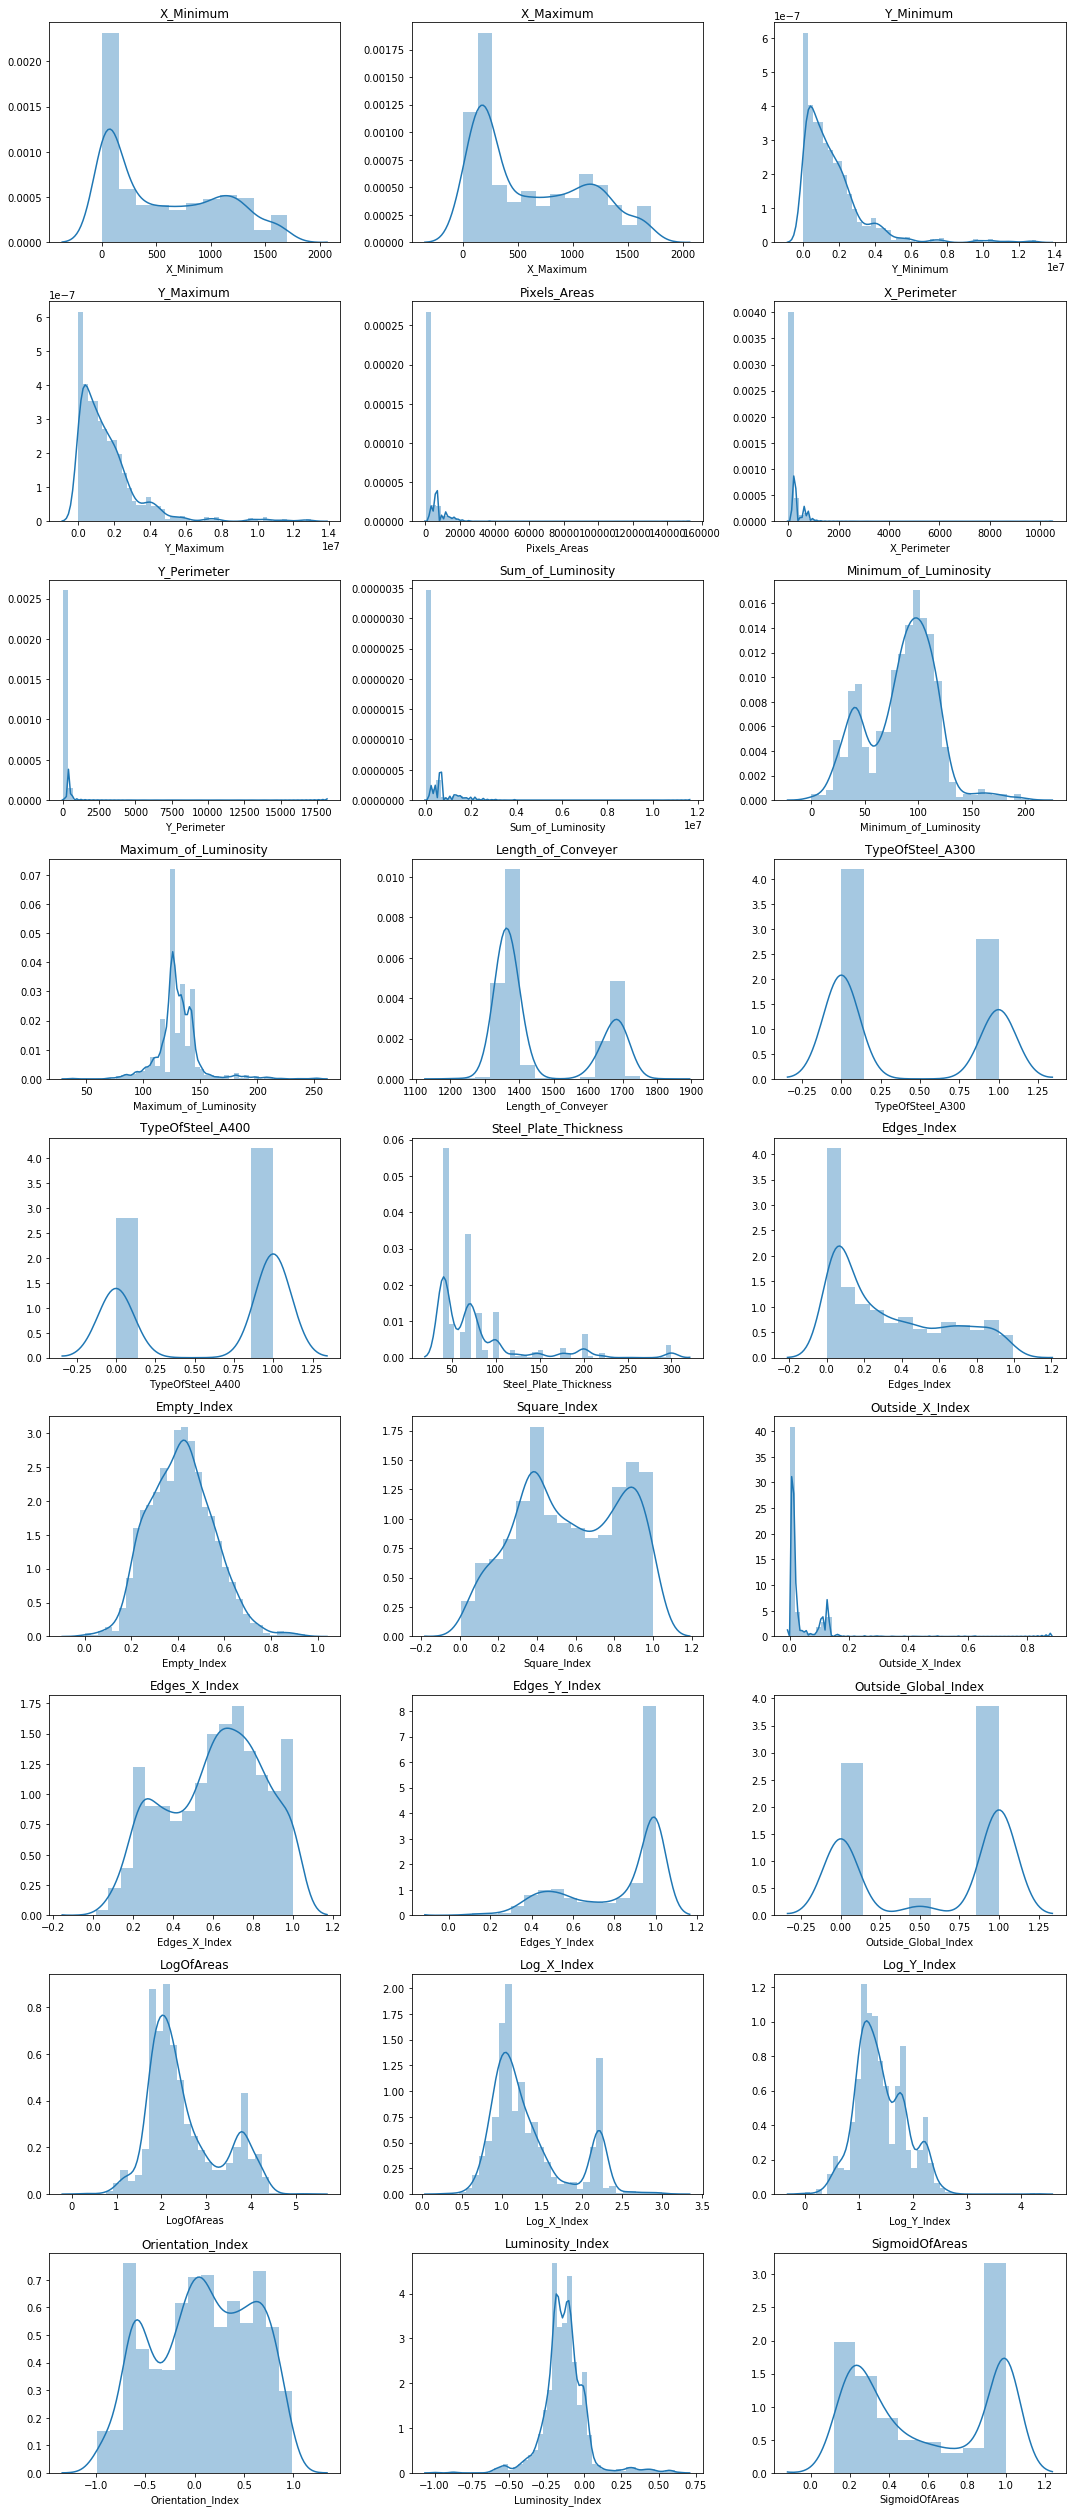

In [24]:
fig, axs = plt.subplots(nrows=9,ncols=3,figsize=(15,35),tight_layout=True)
axs = axs.flatten()

for col,ax in zip(X.columns,axs):
    sns.distplot(X[col],ax=ax)
    ax.set_title(col)

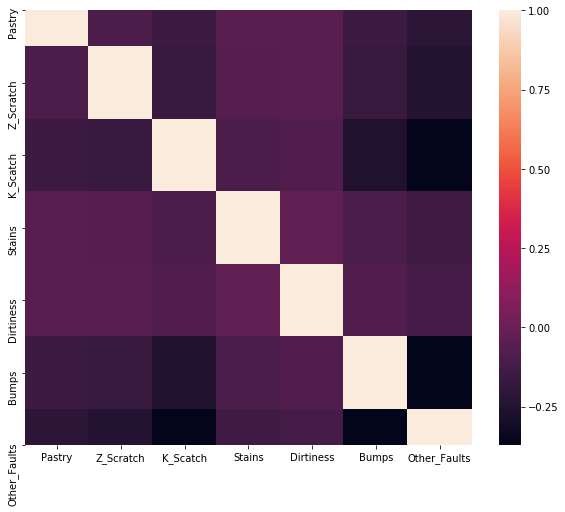

In [124]:
plt.figure(figsize=(10,8))
sns.heatmap(y.corr())

    From the above plot it is clear that, few of the fault types have a negative correlations but the others don't.

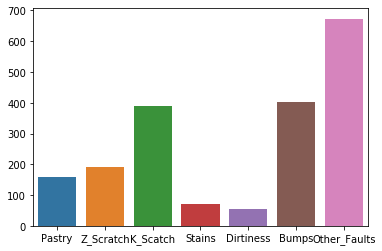

In [135]:
sns.barplot(y.sum().keys(),y.sum().values)

## Problem Transformation

#### Binary Relevance
    Technique where each y is considered individually and a classifier is built for each of those. The downside is that the negative correlation we have noticed from the heatmap will not be taken into account since each classifier would be independent of the other fault types

In [201]:
from skmultilearn.problem_transform import BinaryRelevance, ClassifierChain, LabelPowerset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### No Preprocessing

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [328]:
def train_classifiers(clf,X_train,X_test,y_train,y_test,label='test'):
    clf.fit(X_train,y_train)
    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)
    
    print('{} train accuracy: {}, f1_score: {}'.format(clf,accuracy_score(y_train,train_pred),
                                                      f1_score(y_train,train_pred,average='micro')))
    print('{} {} accuracy: {}, f1_score: {}'.format(clf,label,accuracy_score(y_test,test_pred),
                                                     f1_score(y_test,test_pred,average='micro')))
    

In [214]:
train_classifiers(BinaryRelevance(LogisticRegression()), X_train, X_test, y_train, y_test)

/Users/gurumanikanta/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/gurumanikanta/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

BinaryRelevance(classifier=LogisticRegression(C=1.0, class_weight=None,
                                              dual=False, fit_intercept=True,
                                              intercept_scaling=1,
                                              l1_ratio=None, max_iter=100,
                                              multi_class='auto', n_jobs=None,
                                              penalty='l2', random_state=None,
                                              solver='lbfgs', tol=0.0001,
                                              verbose=0, warm_start=False),
                require_dense=[True, True]) train accuracy: 0.17672790901137359, f1_score: 0.2954876273653566
BinaryRelevance(classifier=LogisticRegression(C=1.0, class_weight=None,
                                              dual=False, fit_intercept=True,
                                              intercept_scaling=1,
                                              l1_ratio=None, max_iter=100

In [215]:
train_classifiers(BinaryRelevance(SVC()),X_train, X_test, y_train, y_test)

BinaryRelevance(classifier=SVC(C=1.0, break_ties=False, cache_size=200,
                               class_weight=None, coef0=0.0,
                               decision_function_shape='ovr', degree=3,
                               gamma='scale', kernel='rbf', max_iter=-1,
                               probability=False, random_state=None,
                               shrinking=True, tol=0.001, verbose=False),
                require_dense=[True, True]) train accuracy: 0.13648293963254593, f1_score: 0.2363636363636364
BinaryRelevance(classifier=SVC(C=1.0, break_ties=False, cache_size=200,
                               class_weight=None, coef0=0.0,
                               decision_function_shape='ovr', degree=3,
                               gamma='scale', kernel='rbf', max_iter=-1,
                               probability=False, random_state=None,
                               shrinking=True, tol=0.001, verbose=False),
                require_dense=[True, True]) test

In [216]:
train_classifiers(BinaryRelevance(DecisionTreeClassifier()),X_train, X_test, y_train, y_test)

BinaryRelevance(classifier=DecisionTreeClassifier(ccp_alpha=0.0,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  presort='deprecated',
                                                  random_state=None,
                                                  splitter='best'),
          

In [217]:
train_classifiers(BinaryRelevance(RandomForestClassifier()),X_train, X_test, y_train, y_test)

BinaryRelevance(classifier=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  max_samples=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100, n_jobs=None,
                                                  oo

Classifier for:  Pastry


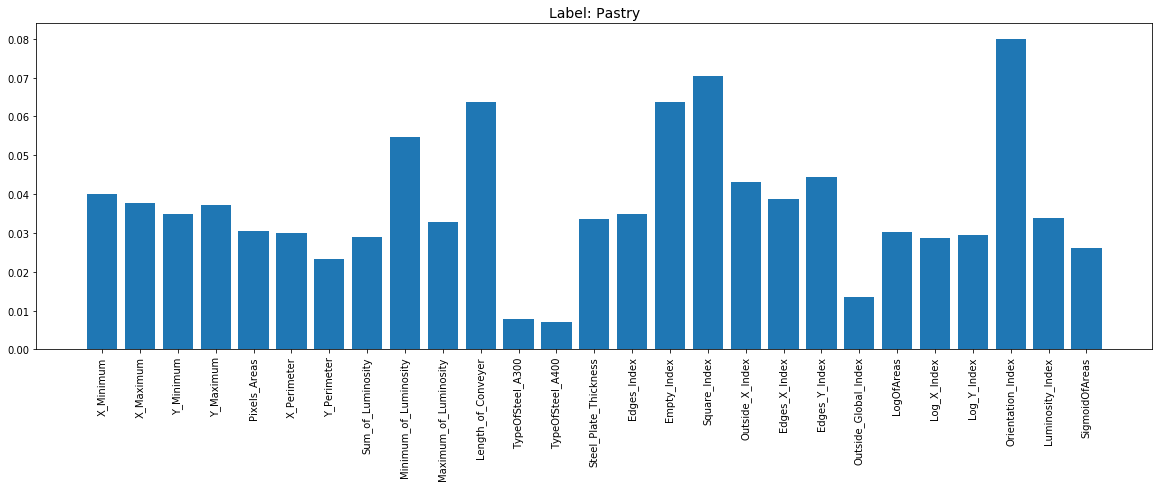



Classifier for:  Z_Scratch


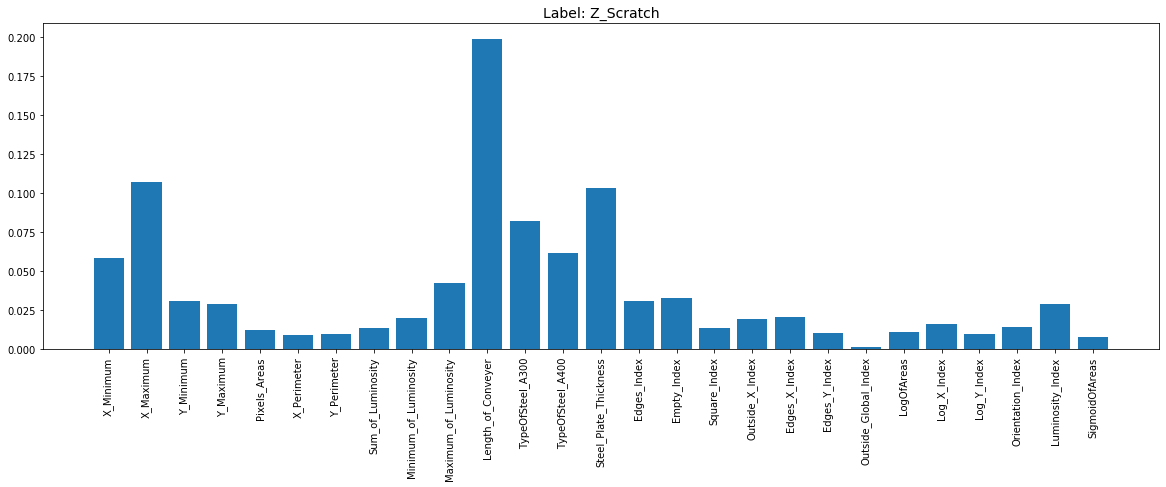



Classifier for:  K_Scatch


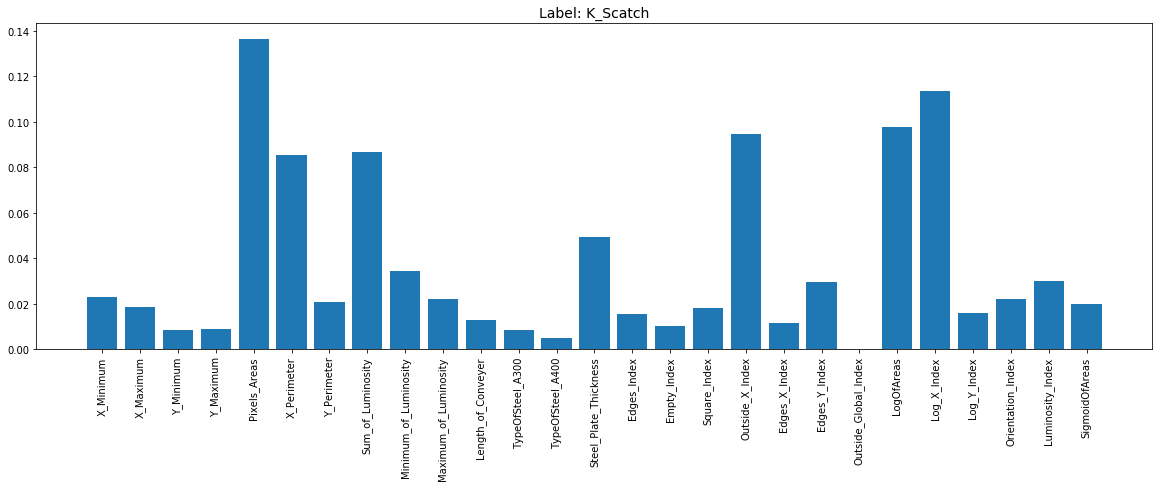



Classifier for:  Stains


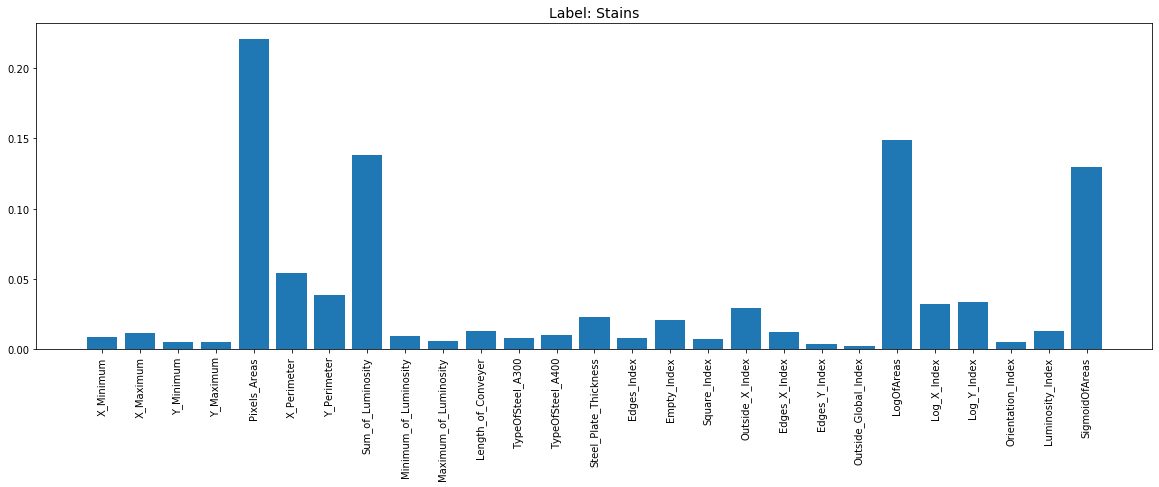



Classifier for:  Dirtiness


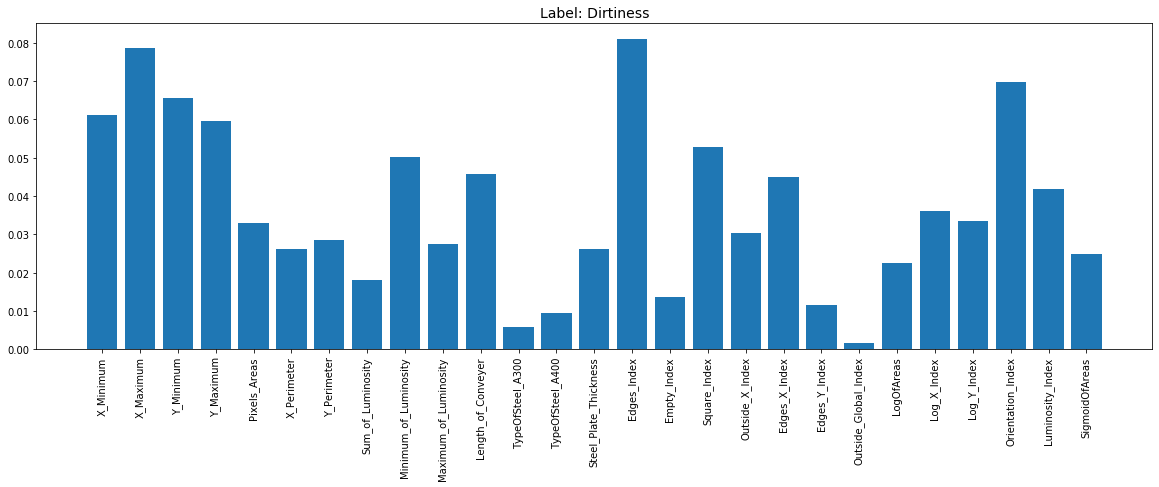



Classifier for:  Bumps


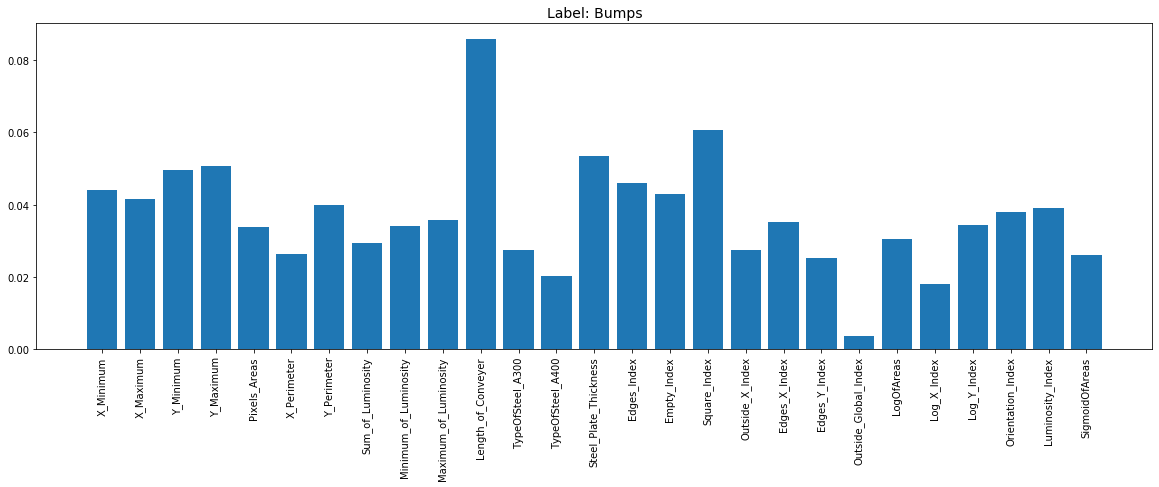



Classifier for:  Other_Faults


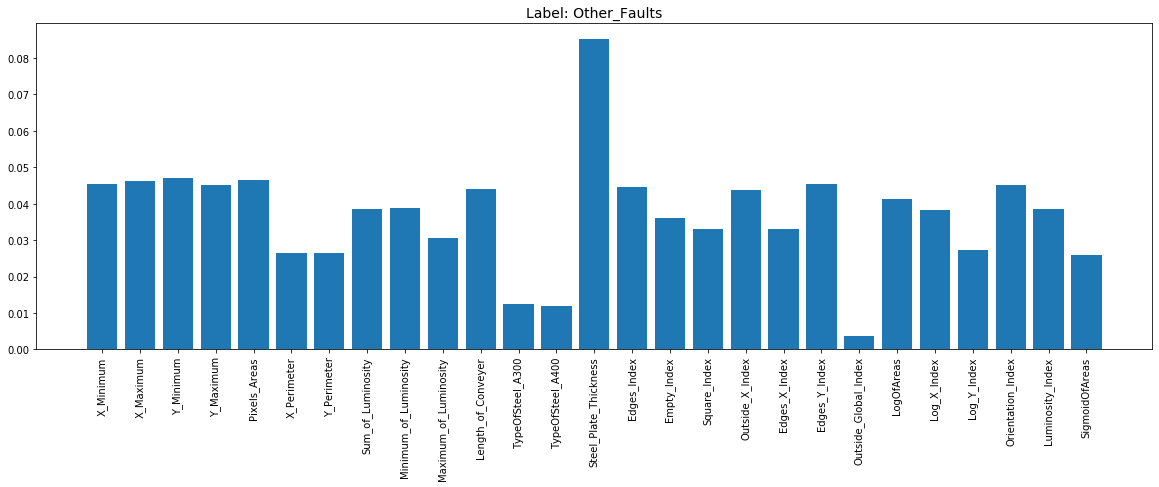

In [705]:
for col in y.columns:
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train[col])
    print('Classifier for: ',col)
    feat_imp = dict(zip(X_train.columns,rfc.feature_importances_))
    plt.figure(figsize=(20,6))
    plt.bar(feat_imp.keys(),feat_imp.values())
    plt.xticks(rotation = 90)
    plt.title('Label: {}'.format(col),fontsize=14)
    plt.show()
    print('\n')

    For most part it seems like all the features are being used to some extent expect the faults where the # data points are very less like stains

### Standard Scaling

In [218]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [219]:
X_scaled = ss.fit_transform(X)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled,y,test_size=0.1)

In [220]:
train_classifiers(BinaryRelevance(LogisticRegression(solver='liblinear',penalty='l1')),
                  X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled)

BinaryRelevance(classifier=LogisticRegression(C=1.0, class_weight=None,
                                              dual=False, fit_intercept=True,
                                              intercept_scaling=1,
                                              l1_ratio=None, max_iter=100,
                                              multi_class='auto', n_jobs=None,
                                              penalty='l1', random_state=None,
                                              solver='liblinear', tol=0.0001,
                                              verbose=0, warm_start=False),
                require_dense=[True, True]) train accuracy: 0.5555555555555556, f1_score: 0.671100764881942
BinaryRelevance(classifier=LogisticRegression(C=1.0, class_weight=None,
                                              dual=False, fit_intercept=True,
                                              intercept_scaling=1,
                                              l1_ratio=None, max_iter=1

In [221]:
train_classifiers(BinaryRelevance(SVC()),X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled)

BinaryRelevance(classifier=SVC(C=1.0, break_ties=False, cache_size=200,
                               class_weight=None, coef0=0.0,
                               decision_function_shape='ovr', degree=3,
                               gamma='scale', kernel='rbf', max_iter=-1,
                               probability=False, random_state=None,
                               shrinking=True, tol=0.001, verbose=False),
                require_dense=[True, True]) train accuracy: 0.6718213058419243, f1_score: 0.7616580310880829
BinaryRelevance(classifier=SVC(C=1.0, break_ties=False, cache_size=200,
                               class_weight=None, coef0=0.0,
                               decision_function_shape='ovr', degree=3,
                               gamma='scale', kernel='rbf', max_iter=-1,
                               probability=False, random_state=None,
                               shrinking=True, tol=0.001, verbose=False),
                require_dense=[True, True]) test 

In [222]:
train_classifiers(BinaryRelevance(DecisionTreeClassifier()),
                  X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled)

BinaryRelevance(classifier=DecisionTreeClassifier(ccp_alpha=0.0,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  presort='deprecated',
                                                  random_state=None,
                                                  splitter='best'),
          

In [223]:
train_classifiers(BinaryRelevance(RandomForestClassifier()),
                  X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled)

BinaryRelevance(classifier=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  max_samples=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100, n_jobs=None,
                                                  oo

### Creating a  validation set out of train
    
    Best models before preprocessing were DecisionTree and RandomForest but with overfit
    The best one after scaling was support vector classifier. After identifying the promising features, we can then tune parameters to reduce the gap between train and test performance
    
    From the heatmap it was clear that x_min, x_max are highly correlated so are y_min, y_max. So, I shall create a new feature distance between (x_min,y_min) and (x_max,y_max)

In [224]:
X['euc_dist'] = np.sqrt((X['X_Maximum']-X['X_Minimum'])**2+(X['Y_Maximum']-X['Y_Minimum'])**2)

In [225]:
X_scaled = pd.DataFrame(data=ss.fit_transform(X),columns=X.columns)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)

In [226]:
train_classifiers(BinaryRelevance(SVC()),
                  X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled)

BinaryRelevance(classifier=SVC(C=1.0, break_ties=False, cache_size=200,
                               class_weight=None, coef0=0.0,
                               decision_function_shape='ovr', degree=3,
                               gamma='scale', kernel='rbf', max_iter=-1,
                               probability=False, random_state=None,
                               shrinking=True, tol=0.001, verbose=False),
                require_dense=[True, True]) train accuracy: 0.6798396334478809, f1_score: 0.7667525773195876
BinaryRelevance(classifier=SVC(C=1.0, break_ties=False, cache_size=200,
                               class_weight=None, coef0=0.0,
                               decision_function_shape='ovr', degree=3,
                               gamma='scale', kernel='rbf', max_iter=-1,
                               probability=False, random_state=None,
                               shrinking=True, tol=0.001, verbose=False),
                require_dense=[True, True]) test 

    A direct inclusion of euc_dist didn't improve the performance nor did it reduce overfit. 
    I shall check if removing the original features will improve accuracy

In [227]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_scaled.drop(labels=['X_Minimum','X_Maximum','Y_Minimum','Y_Maximum'],axis=1), y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)

In [229]:
train_classifiers(BinaryRelevance(SVC()),
                  X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled)

BinaryRelevance(classifier=SVC(C=1.0, break_ties=False, cache_size=200,
                               class_weight=None, coef0=0.0,
                               decision_function_shape='ovr', degree=3,
                               gamma='scale', kernel='rbf', max_iter=-1,
                               probability=False, random_state=None,
                               shrinking=True, tol=0.001, verbose=False),
                require_dense=[True, True]) train accuracy: 0.6426116838487973, f1_score: 0.7333767926988266
BinaryRelevance(classifier=SVC(C=1.0, break_ties=False, cache_size=200,
                               class_weight=None, coef0=0.0,
                               decision_function_shape='ovr', degree=3,
                               gamma='scale', kernel='rbf', max_iter=-1,
                               probability=False, random_state=None,
                               shrinking=True, tol=0.001, verbose=False),
                require_dense=[True, True]) test 

    There is a reduction in accuracy, it's better to get back the original features and remove the euc_dist that's created

In [255]:
X_scaled.drop(labels=['euc_dist'],axis=1,inplace=True)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.1)
X_train_scaled, X_val_scaled, y_train_scaled, y_val_scaled = train_test_split(X_train_scaled, y_train_scaled, test_size=0.1)

In [244]:
from sklearn.decomposition import PCA

In [256]:
#trying to identify the ideal number of PCs
for n_comp in range(1,20,2):
    pca = PCA(n_comp)
    scaled_pca_train = pca.fit_transform(X_train_scaled)
    scaled_pca_val = pca.transform(X_val_scaled)
    print('#components: {}, expalined_variance:{}'.format(n_comp,pca.explained_variance_ratio_.sum()))

#components: 1, expalined_variance:0.3048389741703719
#components: 3, expalined_variance:0.5294821306469746
#components: 5, expalined_variance:0.6974926460270776
#components: 7, expalined_variance:0.8066706553253663
#components: 9, expalined_variance:0.8776970296349441
#components: 11, expalined_variance:0.9320606776815162
#components: 13, expalined_variance:0.9639020795593375
#components: 15, expalined_variance:0.9833946885560241
#components: 17, expalined_variance:0.9933246021864248
#components: 19, expalined_variance:0.9975528151168097


Text(0.5, 1.0, 'Expalined Variance')

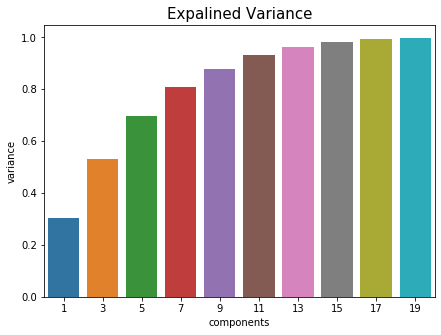

In [673]:
comp = [1,3,5,7,9,11,13,15,17,19]
exp_var = [0.3048389741703719, 0.5294821306469746, 0.6974926460270776, 0.8066706553253663, 0.8776970296349441, 
          0.9320606776815162, 0.9639020795593375, 0.9833946885560241, 0.9933246021864248, 0.9975528151168097]

plt.figure(figsize=(7,5))
sns.barplot(comp,exp_var)
plt.xlabel('components')
plt.ylabel('variance')
plt.title('Expalined Variance',fontsize=15)

In [257]:
# let's try with 15, 17 and 19 PCs
pca = PCA(15)
scaled_pca_train = pca.fit_transform(X_train_scaled)
scaled_pca_val = pca.transform(X_val_scaled)

train_classifiers(BinaryRelevance(SVC()),scaled_pca_train,scaled_pca_val,y_train_scaled,y_val_scaled)

BinaryRelevance(classifier=SVC(C=1.0, break_ties=False, cache_size=200,
                               class_weight=None, coef0=0.0,
                               decision_function_shape='ovr', degree=3,
                               gamma='scale', kernel='rbf', max_iter=-1,
                               probability=False, random_state=None,
                               shrinking=True, tol=0.001, verbose=False),
                require_dense=[True, True]) train accuracy: 0.6791852323360916, f1_score: 0.7645587709896391
BinaryRelevance(classifier=SVC(C=1.0, break_ties=False, cache_size=200,
                               class_weight=None, coef0=0.0,
                               decision_function_shape='ovr', degree=3,
                               gamma='scale', kernel='rbf', max_iter=-1,
                               probability=False, random_state=None,
                               shrinking=True, tol=0.001, verbose=False),
                require_dense=[True, True]) test 

In [258]:
pca = PCA(17)
scaled_pca_train = pca.fit_transform(X_train_scaled)
scaled_pca_val = pca.transform(X_val_scaled)

train_classifiers(BinaryRelevance(SVC()),scaled_pca_train,scaled_pca_val,y_train_scaled,y_val_scaled)

BinaryRelevance(classifier=SVC(C=1.0, break_ties=False, cache_size=200,
                               class_weight=None, coef0=0.0,
                               decision_function_shape='ovr', degree=3,
                               gamma='scale', kernel='rbf', max_iter=-1,
                               probability=False, random_state=None,
                               shrinking=True, tol=0.001, verbose=False),
                require_dense=[True, True]) train accuracy: 0.6817313812858052, f1_score: 0.7670840787119857
BinaryRelevance(classifier=SVC(C=1.0, break_ties=False, cache_size=200,
                               class_weight=None, coef0=0.0,
                               decision_function_shape='ovr', degree=3,
                               gamma='scale', kernel='rbf', max_iter=-1,
                               probability=False, random_state=None,
                               shrinking=True, tol=0.001, verbose=False),
                require_dense=[True, True]) test 

In [267]:
pca = PCA(19)
scaled_pca_train = pca.fit_transform(X_train_scaled)
scaled_pca_val = pca.transform(X_val_scaled)

train_classifiers(BinaryRelevance(SVC()),scaled_pca_train,scaled_pca_val,y_train_scaled,y_val_scaled)

BinaryRelevance(classifier=SVC(C=1.0, break_ties=False, cache_size=200,
                               class_weight=None, coef0=0.0,
                               decision_function_shape='ovr', degree=3,
                               gamma='scale', kernel='rbf', max_iter=-1,
                               probability=False, random_state=None,
                               shrinking=True, tol=0.001, verbose=False),
                require_dense=[True, True]) train accuracy: 0.683004455760662, f1_score: 0.7681314755269739
BinaryRelevance(classifier=SVC(C=1.0, break_ties=False, cache_size=200,
                               class_weight=None, coef0=0.0,
                               decision_function_shape='ovr', degree=3,
                               gamma='scale', kernel='rbf', max_iter=-1,
                               probability=False, random_state=None,
                               shrinking=True, tol=0.001, verbose=False),
                require_dense=[True, True]) test a

    15 and 17 principle components have a stable performance

#### Tune parameters - Scaled dataset, 15 Principle components

In [332]:
pca = PCA(15)
scaled_pca_train = pca.fit_transform(X_train_scaled)
scaled_pca_val = pca.transform(X_val_scaled)
scaled_pca_test = pca.transform(X_test_scaled)
train_classifiers(BinaryRelevance(SVC()),scaled_pca_train,scaled_pca_val,y_train_scaled,y_val_scaled)

BinaryRelevance(classifier=SVC(C=1.0, break_ties=False, cache_size=200,
                               class_weight=None, coef0=0.0,
                               decision_function_shape='ovr', degree=3,
                               gamma='scale', kernel='rbf', max_iter=-1,
                               probability=False, random_state=None,
                               shrinking=True, tol=0.001, verbose=False),
                require_dense=[True, True]) train accuracy: 0.6791852323360916, f1_score: 0.7645587709896391
BinaryRelevance(classifier=SVC(C=1.0, break_ties=False, cache_size=200,
                               class_weight=None, coef0=0.0,
                               decision_function_shape='ovr', degree=3,
                               gamma='scale', kernel='rbf', max_iter=-1,
                               probability=False, random_state=None,
                               shrinking=True, tol=0.001, verbose=False),
                require_dense=[True, True]) test 

In [334]:
for deg in range(2,5,1):
    for c in range(1,6):
        print('Degree: {}, C: {}'.format(deg,c))
        train_classifiers(BinaryRelevance(SVC(degree=deg,C=c)), scaled_pca_train, scaled_pca_val,
                         y_train_scaled, y_val_scaled)
        print('\n')

Degree: 2, C: 1
BinaryRelevance(classifier=SVC(C=1, break_ties=False, cache_size=200,
                               class_weight=None, coef0=0.0,
                               decision_function_shape='ovr', degree=2,
                               gamma='scale', kernel='rbf', max_iter=-1,
                               probability=False, random_state=None,
                               shrinking=True, tol=0.001, verbose=False),
                require_dense=[True, True]) train accuracy: 0.6791852323360916, f1_score: 0.7645587709896391
BinaryRelevance(classifier=SVC(C=1, break_ties=False, cache_size=200,
                               class_weight=None, coef0=0.0,
                               decision_function_shape='ovr', degree=2,
                               gamma='scale', kernel='rbf', max_iter=-1,
                               probability=False, random_state=None,
                               shrinking=True, tol=0.001, verbose=False),
                require_dense=[True, 

BinaryRelevance(classifier=SVC(C=4, break_ties=False, cache_size=200,
                               class_weight=None, coef0=0.0,
                               decision_function_shape='ovr', degree=3,
                               gamma='scale', kernel='rbf', max_iter=-1,
                               probability=False, random_state=None,
                               shrinking=True, tol=0.001, verbose=False),
                require_dense=[True, True]) train accuracy: 0.7619350732017823, f1_score: 0.8266211604095564
BinaryRelevance(classifier=SVC(C=4, break_ties=False, cache_size=200,
                               class_weight=None, coef0=0.0,
                               decision_function_shape='ovr', degree=3,
                               gamma='scale', kernel='rbf', max_iter=-1,
                               probability=False, random_state=None,
                               shrinking=True, tol=0.001, verbose=False),
                require_dense=[True, True]) test accu

In [335]:
for c in range(1,10):
    print('Degree: {}, C: {}'.format(3,c))
    train_classifiers(BinaryRelevance(SVC(degree=deg,C=c)), scaled_pca_train, scaled_pca_val,
                     y_train_scaled, y_val_scaled)
    print('\n')

Degree: 3, C: 1
BinaryRelevance(classifier=SVC(C=1, break_ties=False, cache_size=200,
                               class_weight=None, coef0=0.0,
                               decision_function_shape='ovr', degree=4,
                               gamma='scale', kernel='rbf', max_iter=-1,
                               probability=False, random_state=None,
                               shrinking=True, tol=0.001, verbose=False),
                require_dense=[True, True]) train accuracy: 0.6791852323360916, f1_score: 0.7645587709896391
BinaryRelevance(classifier=SVC(C=1, break_ties=False, cache_size=200,
                               class_weight=None, coef0=0.0,
                               decision_function_shape='ovr', degree=4,
                               gamma='scale', kernel='rbf', max_iter=-1,
                               probability=False, random_state=None,
                               shrinking=True, tol=0.001, verbose=False),
                require_dense=[True, 

BinaryRelevance(classifier=SVC(C=9, break_ties=False, cache_size=200,
                               class_weight=None, coef0=0.0,
                               decision_function_shape='ovr', degree=4,
                               gamma='scale', kernel='rbf', max_iter=-1,
                               probability=False, random_state=None,
                               shrinking=True, tol=0.001, verbose=False),
                require_dense=[True, True]) train accuracy: 0.8096753660089115, f1_score: 0.8620113598396258
BinaryRelevance(classifier=SVC(C=9, break_ties=False, cache_size=200,
                               class_weight=None, coef0=0.0,
                               decision_function_shape='ovr', degree=4,
                               gamma='scale', kernel='rbf', max_iter=-1,
                               probability=False, random_state=None,
                               shrinking=True, tol=0.001, verbose=False),
                require_dense=[True, True]) test accu

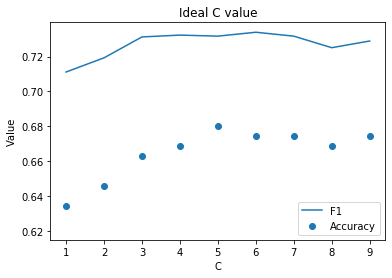

In [666]:
val_accuracy = [0.6342857142857142, 0.6457142857142857, 0.6628571428571428, 0.6685714285714286, 0.68, 
                0.6742857142857143, 0.6742857142857143, 0.6685714285714286, 0.6742857142857143]

val_f1 = [0.7111111111111111, 0.719242902208202, 0.73125, 0.7323076923076924, 0.7317073170731706, 0.7339449541284403,
         0.7317073170731706, 0.7250755287009063, 0.7289156626506025]

plt.scatter(x = range(1,10),y=val_accuracy,label='Accuracy')
plt.plot(range(1,10),val_f1,label='F1')

plt.xlabel('C')
plt.ylabel('Value')
plt.title('Ideal C value')
plt.legend()
plt.show()

In [333]:
#C=5 is ideal
clf = BinaryRelevance(SVC(degree=2,C=5))
train_classifiers(clf, scaled_pca_train, scaled_pca_val,
                     y_train_scaled, y_val_scaled,label='validation')

BinaryRelevance(classifier=SVC(C=5, break_ties=False, cache_size=200,
                               class_weight=None, coef0=0.0,
                               decision_function_shape='ovr', degree=2,
                               gamma='scale', kernel='rbf', max_iter=-1,
                               probability=False, random_state=None,
                               shrinking=True, tol=0.001, verbose=False),
                require_dense=[True, True]) train accuracy: 0.7759388924252069, f1_score: 0.8359428182437032
BinaryRelevance(classifier=SVC(C=5, break_ties=False, cache_size=200,
                               class_weight=None, coef0=0.0,
                               decision_function_shape='ovr', degree=2,
                               gamma='scale', kernel='rbf', max_iter=-1,
                               probability=False, random_state=None,
                               shrinking=True, tol=0.001, verbose=False),
                require_dense=[True, True]) validatio

In [336]:
pred = clf.predict(scaled_pca_test)
print('Test Accuracy: {}'.format(accuracy_score(y_test_scaled,pred)))
print('Test F1: {}'.format(f1_score(y_test_scaled,pred,average='micro')))

Test Accuracy: 0.6615384615384615
Test F1: 0.7186629526462397


In [675]:
result_dict = {'Model':[],'Method':[],'Processing':[],'Data':[],'Accuracy':[],'F1_score':[]}

In [ ]:
# ----------------  BinarayRelevance with SVC    ---------------------------
#No preprocessing
train accuracy: 0.13648293963254593, f1_score: 0.2363636363636364
test accuracy: 0.18461538461538463, f1_score: 0.3076923076923077
        
#StandardScaling
train accuracy: 0.6718213058419243, f1_score: 0.7616580310880829
test accuracy: 0.6461538461538462, f1_score: 0.7383720930232559
        
#PCA and Tuning
train accuracy: 0.7759388924252069, f1_score: 0.8359428182437032
test Accuracy: 0.6615384615384615, f1_score: 0.7186629526462397

In [676]:
result_dict['Model'].append('SVC')
result_dict['Method'].append('BinaryRelevance')
result_dict['Processing'].append('None')
result_dict['Data'].append('Train')
result_dict['Accuracy'].append(0.13648293963254593)
result_dict['F1_score'].append(0.2363636363636364)

result_dict['Model'].append('SVC')
result_dict['Method'].append('BinaryRelevance')
result_dict['Processing'].append('None')
result_dict['Data'].append('Test')
result_dict['Accuracy'].append(0.18461538461538463)
result_dict['F1_score'].append(0.3076923076923077)


result_dict['Model'].append('SVC')
result_dict['Method'].append('BinaryRelevance')
result_dict['Processing'].append('Standard Scaler')
result_dict['Data'].append('Train')
result_dict['Accuracy'].append(0.6718213058419243)
result_dict['F1_score'].append(0.7616580310880829)

result_dict['Model'].append('SVC')
result_dict['Method'].append('BinaryRelevance')
result_dict['Processing'].append('Standard Scaler')
result_dict['Data'].append('Test')
result_dict['Accuracy'].append(0.6461538461538462)
result_dict['F1_score'].append(0.7383720930232559)


result_dict['Model'].append('SVC')
result_dict['Method'].append('BinaryRelevance')
result_dict['Processing'].append('Scaled, PCA and tuned')
result_dict['Data'].append('Train')
result_dict['Accuracy'].append(0.7759388924252069)
result_dict['F1_score'].append(0.8359428182437032)

result_dict['Model'].append('SVC')
result_dict['Method'].append('BinaryRelevance')
result_dict['Processing'].append('Scaled, PCA and tuned')
result_dict['Data'].append('Test')
result_dict['Accuracy'].append(0.6615384615384615)
result_dict['F1_score'].append(0.7186629526462397)


In [337]:
pca = PCA(15)
pca_train = pca.fit_transform(X_train)
pca_val = pca.transform(X_val)
pca_test = pca.transform(X_test)

In [342]:
train_classifiers(RandomForestClassifier(min_samples_split=13,max_depth=8),
                 X_train, X_test, y_train, y_test, label = 'test')

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=13,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) train accuracy: 0.694462126034373, f1_score: 0.7960598321780371
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=13,
                       min_weight_fractio

#### Classification Chain
    
    One target column will be used to train the first classifier, then the used target will be included in the X and another classifier will be trained on this. This process goes on till all target columns are used to train

In [290]:
X.drop(labels=['euc_dist'],axis=1,inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [293]:
train_classifiers(ClassifierChain(LogisticRegression()), X_train, X_test, y_train, y_test)

ClassifierChain(classifier=LogisticRegression(C=1.0, class_weight=None,
                                              dual=False, fit_intercept=True,
                                              intercept_scaling=1,
                                              l1_ratio=None, max_iter=100,
                                              multi_class='auto', n_jobs=None,
                                              penalty='l2', random_state=None,
                                              solver='lbfgs', tol=0.0001,
                                              verbose=0, warm_start=False),
                order=None, require_dense=[True, True]) train accuracy: 0.19530355097365407, f1_score: 0.3204887218045113
ClassifierChain(classifier=LogisticRegression(C=1.0, class_weight=None,
                                              dual=False, fit_intercept=True,
                                              intercept_scaling=1,
                                              l1_ratio=None, 

/Users/gurumanikanta/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/gurumanikanta/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

In [295]:
train_classifiers(ClassifierChain(SVC()),X_train, X_test, y_train, y_test)

ClassifierChain(classifier=SVC(C=1.0, break_ties=False, cache_size=200,
                               class_weight=None, coef0=0.0,
                               decision_function_shape='ovr', degree=3,
                               gamma='scale', kernel='rbf', max_iter=-1,
                               probability=False, random_state=None,
                               shrinking=True, tol=0.001, verbose=False),
                order=None, require_dense=[True, True]) train accuracy: 0.15234822451317298, f1_score: 0.2598925256472887
ClassifierChain(classifier=SVC(C=1.0, break_ties=False, cache_size=200,
                               class_weight=None, coef0=0.0,
                               decision_function_shape='ovr', degree=3,
                               gamma='scale', kernel='rbf', max_iter=-1,
                               probability=False, random_state=None,
                               shrinking=True, tol=0.001, verbose=False),
                order=None, require_

In [296]:
train_classifiers(ClassifierChain(DecisionTreeClassifier()),X_train, X_test, y_train, y_test)

ClassifierChain(classifier=DecisionTreeClassifier(ccp_alpha=0.0,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  presort='deprecated',
                                                  random_state=None,
                                                  splitter='best'),
          

In [297]:
train_classifiers(ClassifierChain(RandomForestClassifier()),X_train, X_test, y_train, y_test)

ClassifierChain(classifier=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  max_samples=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100, n_jobs=None,
                                                  oo

In [298]:
rfc = ClassifierChain(RandomForestClassifier())
rfc.fit(X_train,y_train)

ClassifierChain(classifier=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  max_samples=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100, n_jobs=None,
                                                  oo

In [302]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.1)

In [304]:
def train_classifiers(clf,X_train,X_test,y_train,y_test,label='test'):
    clf.fit(X_train,y_train)
    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)
    
    print('train accuracy: {}, f1_score: {}'.format(accuracy_score(y_train,train_pred),
                                                      f1_score(y_train,train_pred,average='micro')))
    print('{} accuracy: {}, f1_score: {}'.format(label,accuracy_score(y_test,test_pred),
                                                     f1_score(y_test,test_pred,average='micro')))

In [307]:
#tuning parameters
for min_samp in range(10,20,1):
    for max_dpth in range(4,10):
        print('Min_samples split: {}, Max_depth: {}'.format(min_samp,max_dpth))
        train_classifiers(ClassifierChain(RandomForestClassifier(min_samples_split=min_samp,max_depth=max_dpth)),
                         X_train,X_val,y_train,y_val,label='validation')
        print('\n')

Min_samples split: 10, Max_depth: 4
train accuracy: 0.6492679821769574, f1_score: 0.7183098591549296
validation accuracy: 0.5828571428571429, f1_score: 0.6496815286624203


Min_samples split: 10, Max_depth: 5
train accuracy: 0.7562062380649268, f1_score: 0.7781036168132941
validation accuracy: 0.72, f1_score: 0.7383720930232559


Min_samples split: 10, Max_depth: 6
train accuracy: 0.7982176957352005, f1_score: 0.8234523419587292
validation accuracy: 0.72, f1_score: 0.743362831858407


Min_samples split: 10, Max_depth: 7
train accuracy: 0.8338637810311903, f1_score: 0.8451156812339331
validation accuracy: 0.7428571428571429, f1_score: 0.755043227665706


Min_samples split: 10, Max_depth: 8
train accuracy: 0.8682367918523234, f1_score: 0.872680742162508
validation accuracy: 0.76, f1_score: 0.7679083094555873


Min_samples split: 10, Max_depth: 9
train accuracy: 0.8911521323997453, f1_score: 0.8959999999999999
validation accuracy: 0.7714285714285715, f1_score: 0.7780979827089337


Min_sam

train accuracy: 0.6129853596435392, f1_score: 0.7088700772911299
validation accuracy: 0.52, f1_score: 0.6046511627906976


Min_samples split: 18, Max_depth: 5
train accuracy: 0.717377466581795, f1_score: 0.7707550392893747
validation accuracy: 0.6742857142857143, f1_score: 0.728395061728395


Min_samples split: 18, Max_depth: 6
train accuracy: 0.7943984723106302, f1_score: 0.809569996766893
validation accuracy: 0.7314285714285714, f1_score: 0.745664739884393


Min_samples split: 18, Max_depth: 7
train accuracy: 0.8160407383831955, f1_score: 0.8246628131021194
validation accuracy: 0.7371428571428571, f1_score: 0.7471264367816093


Min_samples split: 18, Max_depth: 8
train accuracy: 0.841502227880331, f1_score: 0.8470889315419067
validation accuracy: 0.7371428571428571, f1_score: 0.7449856733524355


Min_samples split: 18, Max_depth: 9
train accuracy: 0.8548695098663271, f1_score: 0.8559592096876991
validation accuracy: 0.76, f1_score: 0.7621776504297995


Min_samples split: 19, Max_dept

In [315]:
for comp in range(1,20,2):
    pca = PCA(comp)
    pca_train = pca.fit_transform(X_train) 
    
    print('Comp: {}, explained_variance: {}'.format(comp,pca.explained_variance_ratio_.sum()))

Comp: 1, explained_variance: 0.957057962228496
Comp: 3, explained_variance: 0.9999999228160033
Comp: 5, explained_variance: 0.9999999967738199
Comp: 7, explained_variance: 0.9999999994035411
Comp: 9, explained_variance: 0.9999999998768478
Comp: 11, explained_variance: 0.999999999991449
Comp: 13, explained_variance: 0.9999999999998846
Comp: 15, explained_variance: 0.9999999999999689
Comp: 17, explained_variance: 0.9999999999999883
Comp: 19, explained_variance: 0.9999999999999962


In [343]:
pca = PCA(15)
pca_train = pca.fit_transform(X_train)
pca_val = pca.transform(X_val)
pca_test = pca.transform(X_test)

rfc = ClassifierChain(classifier=RandomForestClassifier(min_samples_split=13,max_depth=8))
rfc.fit(pca_train,y_train)
pred = rfc.predict(pca_test)
pred_train = rfc.predict(pca_train)
print('train accuracy: {}, f1: {}'.format(accuracy_score(y_train,pred_train),f1_score(y_train,pred_train,average='micro')))
print('test accuracy: {}, f1: {}'.format(accuracy_score(y_test,pred),f1_score(y_test,pred,average='micro')))

train accuracy: 0.8255887969446213, f1: 0.8258516396052213
test accuracy: 0.7025641025641025, f1: 0.7043701799485862


In [344]:
rfc = ClassifierChain(classifier=RandomForestClassifier(min_samples_split=13,max_depth=8))
rfc.fit(X_train,y_train)
pred_train = rfc.predict(X_train)
pred = rfc.predict(X_test)
print('train accuracy: {}, f1: {}'.format(accuracy_score(y_train,pred_train),f1_score(y_train,pred_train,average='micro')))
print('test accuracy: {}, f1: {}'.format(accuracy_score(y_test,pred),f1_score(y_test,pred,average='micro')))

train accuracy: 0.8605983450031827, f1: 0.8620579802484868
test accuracy: 0.7230769230769231, f1: 0.7282051282051283


In [ ]:
# ----------------  Classifierchain with RandomForest    ---------------------------
#No preprocessing
train accuracy: 1.0, f1_score: 1.0
test accuracy: 0.7743589743589744, f1_score: 0.7743589743589745
        
#PCA
train accuracy: 0.8255887969446213, f1: 0.8258516396052213
test accuracy: 0.7025641025641025, f1: 0.7043701799485862
        
#Tuning
train accuracy: 0.8605983450031827, f1: 0.8620579802484868
test accuracy: 0.7230769230769231, f1: 0.7282051282051283

In [677]:
result_dict['Model'].append('RandomForest')
result_dict['Method'].append('ClassifierChain')
result_dict['Processing'].append('None')
result_dict['Data'].append('Train')
result_dict['Accuracy'].append(1.0)
result_dict['F1_score'].append(1.0)

result_dict['Model'].append('RandomForest')
result_dict['Method'].append('ClassifierChain')
result_dict['Processing'].append('None')
result_dict['Data'].append('Test')
result_dict['Accuracy'].append(0.7743589743589744)
result_dict['F1_score'].append(0.7743589743589745)


result_dict['Model'].append('RandomForest')
result_dict['Method'].append('ClassifierChain')
result_dict['Processing'].append('PCA')
result_dict['Data'].append('Train')
result_dict['Accuracy'].append(0.8255887969446213)
result_dict['F1_score'].append(0.8258516396052213)

result_dict['Model'].append('RandomForest')
result_dict['Method'].append('ClassifierChain')
result_dict['Processing'].append('PCA')
result_dict['Data'].append('Test')
result_dict['Accuracy'].append(0.7025641025641025)
result_dict['F1_score'].append(0.7043701799485862)


result_dict['Model'].append('RandomForest')
result_dict['Method'].append('ClassifierChain')
result_dict['Processing'].append('PCA and tuned')
result_dict['Data'].append('Train')
result_dict['Accuracy'].append(0.8605983450031827)
result_dict['F1_score'].append(0.8620579802484868)

result_dict['Model'].append('RandomForest')
result_dict['Method'].append('ClassifierChain')
result_dict['Processing'].append('PCA and tuned')
result_dict['Data'].append('Test')
result_dict['Accuracy'].append(0.7230769230769231)
result_dict['F1_score'].append(0.7282051282051283)

In [311]:
pca = PCA(15)
scaled_pca_train = pca.fit_transform(X_train_scaled)
scaled_pca_val = pca.transform(X_val_scaled)
scaled_pca_test = pca.transform(X_test_scaled)

In [312]:
#tuning parameters
for c in range(1,8):
    print('C: {}'.format(c))
    train_classifiers(ClassifierChain(SVC(C=c)),
                     scaled_pca_train,scaled_pca_val,y_train_scaled,y_val_scaled,label='validation')
    print('\n')

C: 1
train accuracy: 0.7657542966263526, f1_score: 0.7674641148325358
validation accuracy: 0.72, f1_score: 0.7241379310344828


C: 2
train accuracy: 0.7969446212603437, f1_score: 0.7974522292993631
validation accuracy: 0.72, f1_score: 0.7220630372492836


C: 3
train accuracy: 0.8128580521960534, f1_score: 0.8136349155782095
validation accuracy: 0.7485714285714286, f1_score: 0.7507163323782234


C: 4
train accuracy: 0.8325907065563335, f1_score: 0.8325907065563335
validation accuracy: 0.7542857142857143, f1_score: 0.7586206896551724


C: 5
train accuracy: 0.8453214513049013, f1_score: 0.8453214513049013
validation accuracy: 0.7485714285714286, f1_score: 0.7528735632183907


C: 6
train accuracy: 0.8516868236791852, f1_score: 0.8516868236791852
validation accuracy: 0.7428571428571429, f1_score: 0.7471264367816093


C: 7
train accuracy: 0.8593252705283259, f1_score: 0.8593252705283259
validation accuracy: 0.72, f1_score: 0.7241379310344828




In [345]:
train_classifiers(ClassifierChain(SVC(C=3)),
                 X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled,label='test')

ClassifierChain(classifier=SVC(C=3, break_ties=False, cache_size=200,
                               class_weight=None, coef0=0.0,
                               decision_function_shape='ovr', degree=3,
                               gamma='scale', kernel='rbf', max_iter=-1,
                               probability=False, random_state=None,
                               shrinking=True, tol=0.001, verbose=False),
                order=None, require_dense=[True, True]) train accuracy: 0.8287714831317632, f1_score: 0.8292993630573249
ClassifierChain(classifier=SVC(C=3, break_ties=False, cache_size=200,
                               class_weight=None, coef0=0.0,
                               decision_function_shape='ovr', degree=3,
                               gamma='scale', kernel='rbf', max_iter=-1,
                               probability=False, random_state=None,
                               shrinking=True, tol=0.001, verbose=False),
                order=None, require_dense

In [ ]:
# ---------------------- Classifier Chain SVC------------------

#No processing
train accuracy: 0.15234822451317298, f1_score: 0.2598925256472887
test accuracy: 0.16923076923076924, f1_score: 0.2832618025751
        
#Scaling and PCA
train accuracy: 0.8287714831317632, f1_score: 0.8292993630573249
test accuracy: 0.7538461538461538, f1_score: 0.7557840616966581

In [678]:
result_dict['Model'].append('SVC')
result_dict['Method'].append('ClassifierChain')
result_dict['Processing'].append('None')
result_dict['Data'].append('Train')
result_dict['Accuracy'].append(0.15234822451317298)
result_dict['F1_score'].append(0.2598925256472887)

result_dict['Model'].append('SVC')
result_dict['Method'].append('ClassifierChain')
result_dict['Processing'].append('None')
result_dict['Data'].append('Test')
result_dict['Accuracy'].append(0.16923076923076924)
result_dict['F1_score'].append(0.2832618025751)


result_dict['Model'].append('SVC')
result_dict['Method'].append('ClassifierChain')
result_dict['Processing'].append('Scaling and PCA')
result_dict['Data'].append('Train')
result_dict['Accuracy'].append(0.8287714831317632)
result_dict['F1_score'].append(0.8292993630573249)

result_dict['Model'].append('SVC')
result_dict['Method'].append('ClassifierChain')
result_dict['Processing'].append('Scaling and PCA')
result_dict['Data'].append('Test')
result_dict['Accuracy'].append(0.7538461538461538)
result_dict['F1_score'].append(0.7557840616966581)

In [369]:
from skmultilearn.adapt import MLkNN
from scipy import sparse

In [355]:
ml_knn = MLkNN(k=20)
train_classifiers(ml_knn, X_train_scaled.values, X_val_scaled.values, 
                  y_train_scaled.values, y_val_scaled.values,label='validation')

MLkNN(ignore_first_neighbours=0, k=20, s=1.0) train accuracy: 0.6429026098026734, f1_score: 0.7285817134629231
MLkNN(ignore_first_neighbours=0, k=20, s=1.0) validation accuracy: 0.5714285714285714, f1_score: 0.65814696485623


In [360]:
for n in range(5,11,2):
    for s in np.arange(0.75,1.25,0.25):
        train_classifiers(MLkNN(k=n,s=s), X_train_scaled.values, X_val_scaled.values, 
                  y_train_scaled.values, y_val_scaled.values,label='validation')
        print('\n')

MLkNN(ignore_first_neighbours=0, k=5, s=0.75) train accuracy: 0.7702100572883513, f1_score: 0.8148148148148149
MLkNN(ignore_first_neighbours=0, k=5, s=0.75) validation accuracy: 0.6971428571428572, f1_score: 0.71976401179941


MLkNN(ignore_first_neighbours=0, k=5, s=1.0) train accuracy: 0.7702100572883513, f1_score: 0.8148148148148149
MLkNN(ignore_first_neighbours=0, k=5, s=1.0) validation accuracy: 0.6971428571428572, f1_score: 0.71976401179941


MLkNN(ignore_first_neighbours=0, k=7, s=0.75) train accuracy: 0.7453851050286442, f1_score: 0.7946488294314381
MLkNN(ignore_first_neighbours=0, k=7, s=0.75) validation accuracy: 0.6742857142857143, f1_score: 0.7289156626506025


MLkNN(ignore_first_neighbours=0, k=7, s=1.0) train accuracy: 0.7453851050286442, f1_score: 0.7946488294314381
MLkNN(ignore_first_neighbours=0, k=7, s=1.0) validation accuracy: 0.6742857142857143, f1_score: 0.7289156626506025


MLkNN(ignore_first_neighbours=0, k=9, s=0.75) train accuracy: 0.7275620623806492, f1_score: 

In [361]:
train_classifiers(MLkNN(k=7,s=1), X_train_scaled.values, X_test_scaled.values, 
                  y_train_scaled.values, y_test_scaled.values,label='test')

MLkNN(ignore_first_neighbours=0, k=7, s=1) train accuracy: 0.7453851050286442, f1_score: 0.7946488294314381
MLkNN(ignore_first_neighbours=0, k=7, s=1) test accuracy: 0.676923076923077, f1_score: 0.7371273712737128


In [362]:
train_classifiers(MLkNN(k=7,s=1), scaled_pca_train, scaled_pca_test, 
                  y_train_scaled.values, y_test_scaled.values,label='test')

MLkNN(ignore_first_neighbours=0, k=7, s=1) train accuracy: 0.7167409293443666, f1_score: 0.7920723226703755
MLkNN(ignore_first_neighbours=0, k=7, s=1) test accuracy: 0.6512820512820513, f1_score: 0.7170868347338936


In [366]:
for n in range(5,20,2):
    for s in np.arange(0.75,1.25,0.25):
        train_classifiers(MLkNN(k=n,s=s), scaled_pca_train, scaled_pca_val, 
                  y_train_scaled.values, y_val_scaled.values,label='validation')
        print('\n')

MLkNN(ignore_first_neighbours=0, k=5, s=0.75) train accuracy: 0.7740292807129217, f1_score: 0.8159733777038269
MLkNN(ignore_first_neighbours=0, k=5, s=0.75) validation accuracy: 0.6914285714285714, f1_score: 0.71976401179941


MLkNN(ignore_first_neighbours=0, k=5, s=1.0) train accuracy: 0.7740292807129217, f1_score: 0.8159733777038269
MLkNN(ignore_first_neighbours=0, k=5, s=1.0) validation accuracy: 0.6914285714285714, f1_score: 0.71976401179941


MLkNN(ignore_first_neighbours=0, k=7, s=0.75) train accuracy: 0.7167409293443666, f1_score: 0.7920723226703755
MLkNN(ignore_first_neighbours=0, k=7, s=0.75) validation accuracy: 0.6057142857142858, f1_score: 0.6792452830188679


MLkNN(ignore_first_neighbours=0, k=7, s=1.0) train accuracy: 0.7167409293443666, f1_score: 0.7920723226703755
MLkNN(ignore_first_neighbours=0, k=7, s=1.0) validation accuracy: 0.6057142857142858, f1_score: 0.6792452830188679


MLkNN(ignore_first_neighbours=0, k=9, s=0.75) train accuracy: 0.7339274347549332, f1_score: 

In [367]:
train_classifiers(MLkNN(k=5,s=1), scaled_pca_train, scaled_pca_test, 
                  y_train_scaled.values, y_test_scaled.values,label='test')

MLkNN(ignore_first_neighbours=0, k=5, s=1) train accuracy: 0.7740292807129217, f1_score: 0.8159733777038269
MLkNN(ignore_first_neighbours=0, k=5, s=1) test accuracy: 0.6923076923076923, f1_score: 0.7214854111405835


In [ ]:
# ------------------------------- Algorithm Adaption -----------------------
#standard scaled and tuned
train accuracy: 0.7453851050286442, f1_score: 0.7946488294314381
test accuracy: 0.676923076923077, f1_score: 0.7371273712737128
        
#standard scaled, tuned and PCA
train accuracy: 0.7740292807129217, f1_score: 0.8159733777038269
test accuracy: 0.6923076923076923, f1_score: 0.7214854111405835

In [679]:
result_dict['Model'].append('MultiLabel-KNN')
result_dict['Method'].append('Algorithm Adaption')
result_dict['Processing'].append('Standard Scaled and Tuned')
result_dict['Data'].append('Train')
result_dict['Accuracy'].append(0.7453851050286442)
result_dict['F1_score'].append(0.7946488294314381)

result_dict['Model'].append('MultiLabel-KNN')
result_dict['Method'].append('Algorithm Adaption')
result_dict['Processing'].append('Standard Scaled and Tuned')
result_dict['Data'].append('Test')
result_dict['Accuracy'].append(0.676923076923077)
result_dict['F1_score'].append(0.7371273712737128)


result_dict['Model'].append('MultiLabel-KNN')
result_dict['Method'].append('Algorithm Adaption')
result_dict['Processing'].append('Standard Scaling, PCA and Tuned')
result_dict['Data'].append('Train')
result_dict['Accuracy'].append(0.7740292807129217)
result_dict['F1_score'].append(0.8159733777038269)

result_dict['Model'].append('MultiLabel-KNN')
result_dict['Method'].append('Algorithm Adaption')
result_dict['Processing'].append('Standard Scaling, PCA and Tuned')
result_dict['Data'].append('Test')
result_dict['Accuracy'].append(0.6923076923076923)
result_dict['F1_score'].append(0.7214854111405835)

In [375]:
from sklearn.preprocessing import PolynomialFeatures

In [382]:
poly = PolynomialFeatures(degree=2,interaction_only= True)
poly_train_scaled = poly.fit_transform(X_train_scaled)
poly_val_scaled = poly.transform(X_val_scaled)
poly_test_scaled = poly.transform(X_test_scaled)

train_classifiers(MLkNN(k=5,s=1), poly_train_scaled, poly_test_scaled, 
                  y_train_scaled.values, y_test_scaled.values,label='test')

MLkNN(ignore_first_neighbours=0, k=5, s=1) train accuracy: 0.7702100572883513, f1_score: 0.8094919786096255
MLkNN(ignore_first_neighbours=0, k=5, s=1) test accuracy: 0.6615384615384615, f1_score: 0.7029972752043597


In [386]:
for comp in range(1,20):
    pca = PCA(comp)
    poly_train_scaled_pca = pca.fit_transform(poly_train_scaled)
    print('comp: {}, explained_variance: {}'.format(comp,pca.explained_variance_ratio_.sum()))
    

comp: 1, explained_variance: 0.9258932003925427
comp: 2, explained_variance: 0.9424205885210868
comp: 3, explained_variance: 0.9475703718384473
comp: 4, explained_variance: 0.9523705843974539
comp: 5, explained_variance: 0.9562737098274928
comp: 6, explained_variance: 0.9596630604127826
comp: 7, explained_variance: 0.962181790848119
comp: 8, explained_variance: 0.9643449539883591
comp: 9, explained_variance: 0.9664366043935063
comp: 10, explained_variance: 0.968408175344621
comp: 11, explained_variance: 0.9701950767064642
comp: 12, explained_variance: 0.9718425791357179
comp: 13, explained_variance: 0.9733819589378634
comp: 14, explained_variance: 0.9748561856546075
comp: 15, explained_variance: 0.9760222987606906
comp: 16, explained_variance: 0.9770937856777098
comp: 17, explained_variance: 0.9780397045945768
comp: 18, explained_variance: 0.9789771243487548
comp: 19, explained_variance: 0.979887851499502


In [390]:
pca = PCA(15)
poly_train_scaled_pca = pca.fit_transform(poly_train_scaled)
poly_val_scaled_pca = pca.transform(poly_val_scaled)
poly_test_scaled_pca = pca.transform(poly_test_scaled)

train_classifiers(MLkNN(k=5,s=1), poly_train_scaled_pca, poly_test_scaled_pca, 
                  y_train_scaled.values, y_test_scaled.values,label='test')

MLkNN(ignore_first_neighbours=0, k=5, s=1) train accuracy: 0.7332908975175048, f1_score: 0.7875296509657743
MLkNN(ignore_first_neighbours=0, k=5, s=1) test accuracy: 0.5846153846153846, f1_score: 0.6462395543175488


In [ ]:
# ------------------------------- Algorithm Adaption MLKNN-----------------------
#standard scaled and tuned
train accuracy: 0.7702100572883513, f1_score: 0.8094919786096255
test accuracy: 0.6615384615384615, f1_score: 0.7029972752043597
        
#standard scaled, tuned, PCA and polynomial features
train accuracy: 0.7332908975175048, f1_score: 0.7875296509657743
test accuracy: 0.5846153846153846, f1_score: 0.6462395543175488

In [393]:
train_classifiers(ClassifierChain(SVC(C=3)),poly_train_scaled,poly_test_scaled,y_train_scaled,y_test_scaled,'test')

ClassifierChain(classifier=SVC(C=3, break_ties=False, cache_size=200,
                               class_weight=None, coef0=0.0,
                               decision_function_shape='ovr', degree=3,
                               gamma='scale', kernel='rbf', max_iter=-1,
                               probability=False, random_state=None,
                               shrinking=True, tol=0.001, verbose=False),
                order=None, require_dense=[True, True]) train accuracy: 0.5709739019732655, f1_score: 0.6894171779141104
ClassifierChain(classifier=SVC(C=3, break_ties=False, cache_size=200,
                               class_weight=None, coef0=0.0,
                               decision_function_shape='ovr', degree=3,
                               gamma='scale', kernel='rbf', max_iter=-1,
                               probability=False, random_state=None,
                               shrinking=True, tol=0.001, verbose=False),
                order=None, require_dense

In [394]:
train_classifiers(ClassifierChain(SVC(C=3)), poly_train_scaled_pca, poly_test_scaled_pca, 
                  y_train_scaled.values, y_test_scaled.values,label='test')

ClassifierChain(classifier=SVC(C=3, break_ties=False, cache_size=200,
                               class_weight=None, coef0=0.0,
                               decision_function_shape='ovr', degree=3,
                               gamma='scale', kernel='rbf', max_iter=-1,
                               probability=False, random_state=None,
                               shrinking=True, tol=0.001, verbose=False),
                order=None, require_dense=[True, True]) train accuracy: 0.2788033099936346, f1_score: 0.42621359223300964
ClassifierChain(classifier=SVC(C=3, break_ties=False, cache_size=200,
                               class_weight=None, coef0=0.0,
                               decision_function_shape='ovr', degree=3,
                               gamma='scale', kernel='rbf', max_iter=-1,
                               probability=False, random_state=None,
                               shrinking=True, tol=0.001, verbose=False),
                order=None, require_dens

In [411]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import make_scorer

In [408]:
svc_chain = ClassifierChain(SVC(C=3))
scores = cross_val_score(svc_chain,X=X_train_scaled,y=y_train_scaled,cv=10,scoring=make_scorer(accuracy_score))
print('Scores: ',scores)
print('Scores mean: ',scores.mean())
print('Scores std: ',scores.std())

Scores:  [0.75316456 0.7388535  0.69426752 0.7388535  0.8089172  0.77707006
 0.79617834 0.7388535  0.7388535  0.74522293]
Scores mean:  0.7530234620656292
Scores std:  0.03143401484187466


In [440]:
from sklearn.feature_selection import SelectKBest

for best in range(9,28,3):
    y_pred_new_train = pd.DataFrame(columns = y.columns)
    y_pred_new_val = pd.DataFrame(columns = y.columns)
    for fault in y_train_scaled.columns:
        svc_cc = SVC(C=3)
        kbest = SelectKBest(k=best)
        X_train_new_scaled = kbest.fit_transform(X_train_scaled,y_train_scaled[fault])
        X_val_new_scaled = kbest.transform(X_val_scaled)
        svc_cc.fit(X_train_new_scaled,y_train_scaled[fault])
        y_pred_new_train[fault] = svc_cc.predict(X_train_new_scaled)
        y_pred_new_val[fault] = svc_cc.predict(X_val_new_scaled)

    print('Best {} features'.format(best))
    print('Train accuracy: {}, F1: {}'.format(accuracy_score(y_train_scaled,y_pred_new_train),
                                              f1_score(y_train_scaled,y_pred_new_train,average='micro')))
    print('Validation accuracy: {}, F1: {}'.format(accuracy_score(y_val_scaled,y_pred_new_val),
                                             f1_score(y_val_scaled,y_pred_new_val,average='micro')))
    print('\n')

Best 9 features
Train accuracy: 0.5824315722469765, F1: 0.7089634821099225
Validation accuracy: 0.5085714285714286, F1: 0.6193548387096774


Best 12 features
Train accuracy: 0.5907065563335455, F1: 0.7148714125978383
Validation accuracy: 0.5028571428571429, F1: 0.627831715210356


Best 15 features
Train accuracy: 0.602800763844685, F1: 0.7245841035120149
Validation accuracy: 0.52, F1: 0.6319218241042345


Best 18 features
Train accuracy: 0.6575429662635264, F1: 0.7628643396905362
Validation accuracy: 0.5714285714285714, F1: 0.6645569620253164


Best 21 features
Train accuracy: 0.6919159770846595, F1: 0.7849083215796898
Validation accuracy: 0.6285714285714286, F1: 0.7080745341614907


Best 24 features
Train accuracy: 0.705919796308084, F1: 0.7970401691331924
Validation accuracy: 0.6228571428571429, F1: 0.708860759493671


Best 27 features
Train accuracy: 0.7574793125397836, F1: 0.8236905169462513
Validation accuracy: 0.6685714285714286, F1: 0.7329192546583849




In [446]:
y_pred_new_train = pd.DataFrame(columns = y.columns)
y_pred_new_val = pd.DataFrame(columns = y.columns)
for fault in y_train_scaled.columns:
    svc_cc = DecisionTreeClassifier(max_depth=8)
    rfe = RFE(estimator=svc_cc)
    '''X_train_new_scaled = rfe.fit_transform(X_train_scaled,y_train_scaled[fault])
    X_val_new_scaled = rfe.transform(X_val_scaled)
    svc_cc.fit(X_train_new_scaled,y_train_scaled[fault])
    y_pred_new_train[fault] = svc_cc.predict(X_train_new_scaled)
    y_pred_new_val[fault] = svc_cc.predict(X_val_new_scaled)'''
    rfe.fit(X_train_scaled,y_train_scaled[fault])
    y_pred_new_train[fault] = rfe.predict(X_train_scaled)
    y_pred_new_val[fault] = rfe.predict(X_val_scaled)

#print('Best {} features'.format(best))
print('Train accuracy: {}, F1: {}'.format(accuracy_score(y_train_scaled,y_pred_new_train),
                                          f1_score(y_train_scaled,y_pred_new_train,average='micro')))
print('Validation accuracy: {}, F1: {}'.format(accuracy_score(y_val_scaled,y_pred_new_val),
                                         f1_score(y_val_scaled,y_pred_new_val,average='micro')))
print('\n')

Train accuracy: 0.7982176957352005, F1: 0.8815354070152217
Validation accuracy: 0.6114285714285714, F1: 0.7592067988668555




In [447]:
rfe.n_features_

13

In [459]:
train_classifiers(ClassifierChain(LogisticRegression(solver='liblinear',penalty='l1',l1_ratio=1)),
                 X_train_scaled, X_val_scaled, y_train_scaled, y_val_scaled,label='Validation')

/Users/gurumanikanta/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/Users/gurumanikanta/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/Users/gurumanikanta/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/Users/gurumanikanta/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/Users/gurumanikanta/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/

ClassifierChain(classifier=LogisticRegression(C=1.0, class_weight=None,
                                              dual=False, fit_intercept=True,
                                              intercept_scaling=1, l1_ratio=1,
                                              max_iter=100, multi_class='auto',
                                              n_jobs=None, penalty='l1',
                                              random_state=None,
                                              solver='liblinear', tol=0.0001,
                                              verbose=0, warm_start=False),
                order=None, require_dense=[True, True]) train accuracy: 0.7281985996180776, f1_score: 0.7286032453070315
ClassifierChain(classifier=LogisticRegression(C=1.0, class_weight=None,
                                              dual=False, fit_intercept=True,
                                              intercept_scaling=1, l1_ratio=1,
                                              max

/Users/gurumanikanta/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/Users/gurumanikanta/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


In [461]:
train_classifiers(ClassifierChain(LogisticRegression(solver='liblinear',penalty='l1',l1_ratio=1)),
                poly_train_scaled, poly_val_scaled, y_train_scaled, y_val_scaled,label='Validation')

/Users/gurumanikanta/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/Users/gurumanikanta/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/Users/gurumanikanta/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/Users/gurumanikanta/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/Users/gurumanikanta/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/

ClassifierChain(classifier=LogisticRegression(C=1.0, class_weight=None,
                                              dual=False, fit_intercept=True,
                                              intercept_scaling=1, l1_ratio=1,
                                              max_iter=100, multi_class='auto',
                                              n_jobs=None, penalty='l1',
                                              random_state=None,
                                              solver='liblinear', tol=0.0001,
                                              verbose=0, warm_start=False),
                order=None, require_dense=[True, True]) train accuracy: 0.838319541693189, f1_score: 0.838319541693189
ClassifierChain(classifier=LogisticRegression(C=1.0, class_weight=None,
                                              dual=False, fit_intercept=True,
                                              intercept_scaling=1, l1_ratio=1,
                                              max_i

In [464]:
lgreg = ClassifierChain(LogisticRegression(solver='liblinear',penalty='l1'))
lgreg.fit(poly_train_scaled,y_train_scaled)
pred = lgreg.predict(poly_train_scaled)
pred_test = lgreg.predict(poly_test_scaled)
print('Train accuracy: {}, F1: {}'.format(accuracy_score(y_train_scaled,pred),
                                          f1_score(y_train_scaled,pred,average='micro')))
print('Test accuracy: {}, F1: {}'.format(accuracy_score(y_test_scaled,pred_test),
                                         f1_score(y_test_scaled,pred_test,average='micro')))

Train accuracy: 0.8389560789306174, F1: 0.8389560789306174
Validation accuracy: 0.7589743589743589, F1: 0.7621483375959079


In [680]:
result_dict['Model'].append('LogisticRegression')
result_dict['Method'].append('ClassifierChain')
result_dict['Processing'].append('Interactions, scaled')
result_dict['Data'].append('Train')
result_dict['Accuracy'].append(0.8389560789306174)
result_dict['F1_score'].append(0.8389560789306174)

result_dict['Model'].append('LogisticRegression')
result_dict['Method'].append('ClassifierChain')
result_dict['Processing'].append('Interactions, scaled')
result_dict['Data'].append('Test')
result_dict['Accuracy'].append(0.7589743589743589)
result_dict['F1_score'].append(0.7621483375959079)

In [494]:
X_train_scaled

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
1616,-0.107838,-0.162743,-0.460338,-0.460362,-0.352203,-0.285109,-0.171132,-0.382372,1.383656,1.113459,-0.658363,1.223956,-1.223956,-0.158661,1.413004,0.183614,-1.099925,-0.292829,0.968575,-0.911444,-1.193905,-0.790120,0.013944,-1.376118,-1.618783,1.595559,-1.008416
1002,0.195683,0.154846,-0.428249,-0.428265,-0.310400,-0.278467,-0.142987,-0.351645,-1.293304,-0.331460,1.735428,1.223956,-1.223956,0.386082,1.519801,-0.534179,1.248514,-0.347116,0.720235,0.408294,-1.193905,-0.038021,0.013944,-0.225154,-0.347861,-1.092561,0.380946
1434,1.129299,1.107611,-0.760530,-0.760551,-0.353751,-0.331600,-0.175823,-0.388838,0.076303,0.257211,1.597059,1.223956,-1.223956,1.293987,0.950774,-1.743133,0.845913,-0.465869,0.915947,0.796401,-1.193905,-0.853133,-0.697186,-1.101146,-0.565739,-0.139146,-1.179324
1019,-0.780196,-0.888372,-0.201049,-0.201071,-0.346010,-0.334921,-0.164096,-0.379449,0.356450,-0.117398,1.347994,1.223956,-1.223956,0.022920,-0.441255,-1.133191,1.016031,-0.453994,1.601351,0.796401,0.879804,-0.592206,-0.611202,-0.637062,0.141016,0.092148,-0.967752
1614,-0.230784,-0.277316,-0.545264,-0.545279,-0.309820,-0.205409,-0.126570,-0.321813,1.508165,1.113459,-0.658363,1.223956,-1.223956,-0.158661,1.099956,0.762950,0.565828,-0.204613,-0.125522,-0.381585,-1.193905,-0.032316,0.263172,-0.178481,-0.717315,1.597576,0.883945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,1.248402,1.234244,-0.880869,-0.880888,-0.349107,-0.314996,-0.168786,-0.384832,0.014048,-0.331460,-0.672200,-0.817023,0.817023,1.747939,-0.469957,-1.151409,1.583952,-0.428547,0.150367,0.796401,-0.157051,-0.682351,-0.611202,-0.796673,-0.166329,-0.461882,-1.047312
1316,1.100484,1.085500,-0.866584,-0.866599,-0.343301,-0.285109,-0.154714,-0.373254,1.010126,0.524788,-0.603016,-0.817023,0.817023,-0.703404,-0.066131,0.594615,0.932633,-0.392921,-0.296153,0.796401,0.879804,-0.523868,-0.393751,-0.380362,0.186150,0.789392,-0.562583
1648,-0.292256,-0.389879,-0.879109,-0.879130,-0.361686,-0.348204,-0.178168,-0.397797,0.449832,-1.080677,-0.686037,-0.817023,0.817023,0.930825,0.949439,-0.936435,0.529664,-0.503191,0.426666,0.796401,0.879804,-1.387665,-1.322332,-1.228835,0.404227,-0.428263,-1.300433
1378,1.136983,1.179973,1.684608,1.684577,-0.297047,-0.109106,-0.079663,-0.303736,1.414783,1.488067,-0.686037,1.223956,-1.223956,0.386082,-0.346473,0.808131,-0.524624,-0.041752,-0.324112,-1.904556,-1.193905,0.079510,0.597344,-0.325764,-1.307443,1.584801,1.085204


In [782]:
for deg in range(2,4,1):
    print('Degree: ',deg)
    poly = PolynomialFeatures(degree=deg,interaction_only= True)
    poly_train_scaled.data = poly.fit_transform(X_train_scaled)
    poly_val_scaled = poly.transform(X_val_scaled)
    poly_test_scaled = poly.transform(X_test_scaled)

    train_classifiers(ClassifierChain(LogisticRegression(penalty='l1',solver='liblinear')),
                      poly_train_scaled, poly_val_scaled, 
                      y_train_scaled.values, y_val_scaled.values,label='validation')
    print('\n')

Degree:  2


/Users/gurumanikanta/anaconda3/lib/python3.7/site-packages/scipy/sparse/sputils.py:115: UserWarning: object dtype is not supported by sparse matrices
  warnings.warn("object dtype is not supported by sparse matrices")


TypeError: no supported conversion for types: (dtype('O'),)

In [527]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_mm = mms.fit_transform(X_train)

selected_features = [] 
for label in y_train.columns:
    selector = SelectKBest(chi2, k='all')
    selector.fit(X_train_mm, y_train[label])
    selected_features.append(list(selector.scores_))

# MeanCS 
#selected_features = np.mean(selected_features, axis=0) > threshold
# MaxCS
#selected_features = np.max(selected_features, axis=0) > threshold
selected_cols = X_train.columns[(np.where(np.mean(selected_features,axis=0) >= np.mean(selected_features))[0])]
num_cols = len(selected_cols)
selected_cols

Index(['X_Minimum', 'X_Maximum', 'TypeOfSteel_A300', 'TypeOfSteel_A400',
       'Steel_Plate_Thickness', 'Edges_Index', 'Outside_X_Index',
       'Outside_Global_Index', 'Log_X_Index', 'SigmoidOfAreas'],
      dtype='object')

In [529]:
lgreg = ClassifierChain(RandomForestClassifier())#LogisticRegression(solver='liblinear',penalty='l1'))
lgreg.fit(X_train_scaled[selected_cols],y_train_scaled)
pred = lgreg.predict(X_train_scaled[selected_cols])
pred_test = lgreg.predict(X_test_scaled[selected_cols])
print('Train accuracy: {}, F1: {}'.format(accuracy_score(y_train_scaled,pred),
                                          f1_score(y_train_scaled,pred,average='micro')))
print('Validation accuracy: {}, F1: {}'.format(accuracy_score(y_test_scaled,pred_test),
                                         f1_score(y_test_scaled,pred_test,average='micro')))

Train accuracy: 0.9993634627625716, F1: 0.9993634627625716
Validation accuracy: 0.7025641025641025, F1: 0.7025641025641025


In [530]:
lgreg = ClassifierChain(SVC())#LogisticRegression(solver='liblinear',penalty='l1'))
lgreg.fit(X_train_scaled[selected_cols],y_train_scaled)
pred = lgreg.predict(X_train_scaled[selected_cols])
pred_test = lgreg.predict(X_test_scaled[selected_cols])
print('Train accuracy: {}, F1: {}'.format(accuracy_score(y_train_scaled,pred),
                                          f1_score(y_train_scaled,pred,average='micro')))
print('Validation accuracy: {}, F1: {}'.format(accuracy_score(y_test_scaled,pred_test),
                                         f1_score(y_test_scaled,pred_test,average='micro')))

Train accuracy: 0.6696371737746658, F1: 0.6696371737746658
Validation accuracy: 0.6102564102564103, F1: 0.6118251928020566


In [531]:
lgreg = ClassifierChain(LogisticRegression(solver='liblinear',penalty='l1'))
lgreg.fit(X_train_scaled[selected_cols],y_train_scaled)
pred = lgreg.predict(X_train_scaled[selected_cols])
pred_test = lgreg.predict(X_test_scaled[selected_cols])
print('Train accuracy: {}, F1: {}'.format(accuracy_score(y_train_scaled,pred),
                                          f1_score(y_train_scaled,pred,average='micro')))
print('Validation accuracy: {}, F1: {}'.format(accuracy_score(y_test_scaled,pred_test),
                                         f1_score(y_test_scaled,pred_test,average='micro')))

Train accuracy: 0.6168045830681095, F1: 0.6168045830681095
Validation accuracy: 0.5743589743589743, F1: 0.5743589743589743


In [553]:
def identify_imp_features(clf):
    temp = {'thresholds': np.arange(5,-0.5,-0.5),
            'num_cols': [],
    'train_accuracies': [],
    'train_f1': [],
    'validation_accuracies': [],
    'validation_f1': []
    }
    for th in temp['thresholds']:
        selected_cols = X_train.columns[(np.where(np.mean(selected_features,axis=0) >= th)[0])]
        num_cols = len(selected_cols)
        temp['num_cols'].append(num_cols)
        
        lgreg = ClassifierChain(clf)#LogisticRegression(solver='liblinear',penalty='l1'))
        lgreg.fit(X_train_scaled[selected_cols],y_train_scaled)
        pred = lgreg.predict(X_train_scaled[selected_cols])
        pred_test = lgreg.predict(X_val_scaled[selected_cols])

        temp['train_accuracies'].append(accuracy_score(y_train_scaled,pred))
        temp['train_f1'].append(f1_score(y_train_scaled,pred,average='micro'))
        temp['validation_accuracies'].append(accuracy_score(y_val_scaled,pred_test))
        temp['validation_f1'].append(f1_score(y_val_scaled,pred_test,average='micro'))

    perf = pd.DataFrame(data = temp)
    
    return perf

In [554]:
identify_imp_features(RandomForestClassifier())

,thresholds,num_cols,train_accuracies,train_f1,validation_accuracies,validation_f1
0,5.0,17,1.0,1.0,0.708571,0.710602
1,4.5,19,1.0,1.0,0.691429,0.691429
2,4.0,19,1.0,1.0,0.731429,0.731429
3,3.5,20,1.0,1.0,0.731429,0.731429
4,3.0,21,1.0,1.0,0.708571,0.708571
5,2.5,21,1.0,1.0,0.685714,0.685714
6,2.0,21,1.0,1.0,0.708571,0.708571
7,1.5,22,1.0,1.0,0.697143,0.697143
8,1.0,25,1.0,1.0,0.714286,0.714286
9,0.5,25,1.0,1.0,0.708571,0.710602


In [613]:
svc_imp_feat = identify_imp_features(SVC())
svc_imp_feat.drop(labels=['thresholds'],axis=1)

,num_cols,train_accuracies,train_f1,validation_accuracies,validation_f1
0,17,0.723106,0.723106,0.640000,0.640000
1,19,0.737747,0.737747,0.668571,0.668571
2,19,0.737747,0.737747,0.668571,0.668571
3,20,0.739656,0.739656,0.680000,0.681948
4,21,0.737110,0.737110,0.685714,0.687679
5,21,0.737110,0.737110,0.685714,0.687679
6,21,0.737110,0.737110,0.685714,0.687679
7,22,0.737110,0.737110,0.685714,0.687679
8,25,0.763208,0.765156,0.714286,0.716332
9,25,0.763208,0.765156,0.714286,0.716332


In [600]:
log_imp_feat = identify_imp_features(LogisticRegression())

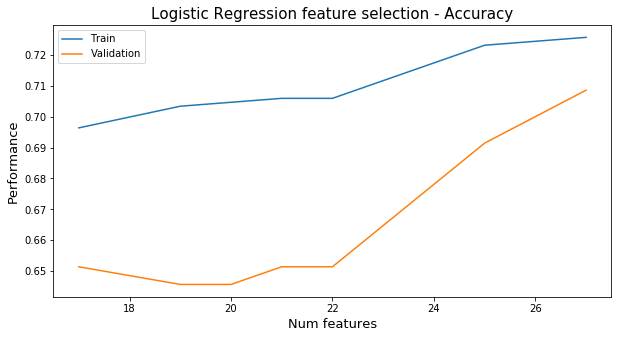

In [612]:
fig,axs = plt.subplots(nrows=1,ncols=1,figsize=(10,5))
#axs = axs.flatten()

axs.plot(log_imp_feat['num_cols'],log_imp_feat['train_accuracies'],label='Train')
axs.plot(log_imp_feat['num_cols'],log_imp_feat['validation_accuracies'],label='Validation')
axs.set_xlabel('Num features',fontsize=13)
axs.set_ylabel('Performance',fontsize=13)
axs.set_title('Logistic Regression feature selection - Accuracy',fontsize=15)
axs.legend()
plt.show()

In [558]:
selected_cols = X_train.columns[(np.where(np.mean(selected_features,axis=0) >= 1)[0])]
train_classifiers(ClassifierChain(LogisticRegression()),X_train_scaled[selected_cols],X_test_scaled[selected_cols],
                 y_train_scaled,y_test_scaled)

ClassifierChain(classifier=LogisticRegression(C=1.0, class_weight=None,
                                              dual=False, fit_intercept=True,
                                              intercept_scaling=1,
                                              l1_ratio=None, max_iter=100,
                                              multi_class='auto', n_jobs=None,
                                              penalty='l2', random_state=None,
                                              solver='lbfgs', tol=0.0001,
                                              verbose=0, warm_start=False),
                order=None, require_dense=[True, True]) train accuracy: 0.7231063017186505, f1_score: 0.7231063017186505
ClassifierChain(classifier=LogisticRegression(C=1.0, class_weight=None,
                                              dual=False, fit_intercept=True,
                                              intercept_scaling=1,
                                              l1_ratio=None, m

In [559]:
selected_cols = X_train.columns[(np.where(np.mean(selected_features,axis=0) >= 1)[0])]
train_classifiers(ClassifierChain(RandomForestClassifier()),X_train_scaled[selected_cols],X_test_scaled[selected_cols],
                 y_train_scaled,y_test_scaled)

ClassifierChain(classifier=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  max_samples=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100, n_jobs=None,
                                                  oo

In [560]:
selected_cols = X_train.columns[(np.where(np.mean(selected_features,axis=0) >= 1)[0])]
train_classifiers(ClassifierChain(SVC()),X_train_scaled[selected_cols],X_test_scaled[selected_cols],
                 y_train_scaled,y_test_scaled)

ClassifierChain(classifier=SVC(C=1.0, break_ties=False, cache_size=200,
                               class_weight=None, coef0=0.0,
                               decision_function_shape='ovr', degree=3,
                               gamma='scale', kernel='rbf', max_iter=-1,
                               probability=False, random_state=None,
                               shrinking=True, tol=0.001, verbose=False),
                order=None, require_dense=[True, True]) train accuracy: 0.7632081476766391, f1_score: 0.765156349712827
ClassifierChain(classifier=SVC(C=1.0, break_ties=False, cache_size=200,
                               class_weight=None, coef0=0.0,
                               decision_function_shape='ovr', degree=3,
                               gamma='scale', kernel='rbf', max_iter=-1,
                               probability=False, random_state=None,
                               shrinking=True, tol=0.001, verbose=False),
                order=None, require_de

### testing with lessened features and some tuning

In [561]:
selected_cols = X_train.columns[(np.where(np.mean(selected_features,axis=0) >= 1)[0])]
train_classifiers(ClassifierChain(LogisticRegression(solver='liblinear',penalty='l1')),
                  X_train_scaled[selected_cols],X_test_scaled[selected_cols],
                 y_train_scaled,y_test_scaled)

ClassifierChain(classifier=LogisticRegression(C=1.0, class_weight=None,
                                              dual=False, fit_intercept=True,
                                              intercept_scaling=1,
                                              l1_ratio=None, max_iter=100,
                                              multi_class='auto', n_jobs=None,
                                              penalty='l1', random_state=None,
                                              solver='liblinear', tol=0.0001,
                                              verbose=0, warm_start=False),
                order=None, require_dense=[True, True]) train accuracy: 0.7231063017186505, f1_score: 0.7231063017186505
ClassifierChain(classifier=LogisticRegression(C=1.0, class_weight=None,
                                              dual=False, fit_intercept=True,
                                              intercept_scaling=1,
                                              l1_ratio=Non

In [589]:
selected_cols = X_train.columns[(np.where(np.mean(selected_features,axis=0) >= 1)[0])]
temp = {'gamma': np.arange(0.1,0,-0.01),
    'train_accuracies': [],
    'train_f1': [],
    'validation_accuracies': [],
    'validation_f1': []
    }
for g in np.arange(0.1,0,-0.01):
    ccs = ClassifierChain(SVC(C=4,gamma=g))
    ccs.fit(X_train_scaled[selected_cols],y_train_scaled)
    pred = ccs.predict(X_train_scaled[selected_cols])
    pred_test = ccs.predict(X_val_scaled[selected_cols])
    temp['train_accuracies'].append(accuracy_score(y_train_scaled,pred))
    temp['train_f1'].append(f1_score(y_train_scaled,pred,average='micro'))
    temp['validation_accuracies'].append(accuracy_score(y_val_scaled,pred_test))
    temp['validation_f1'].append(f1_score(y_val_scaled,pred_test,average='micro'))
    
df = pd.DataFrame(data=temp)
df

,gamma,train_accuracies,train_f1,validation_accuracies,validation_f1
0,0.10,0.917250,0.917542,0.737143,0.741379
1,0.09,0.906429,0.906718,0.742857,0.747126
2,0.08,0.891789,0.892073,0.737143,0.741379
3,0.07,0.873329,0.873885,0.737143,0.741379
4,0.06,0.860598,0.860598,0.748571,0.750716
5,0.05,0.846595,0.846595,0.737143,0.739255
6,0.04,0.830681,0.830681,0.748571,0.750716
7,0.03,0.805856,0.806113,0.737143,0.737143
8,0.02,0.774666,0.774666,0.714286,0.714286
9,0.01,0.741566,0.741566,0.708571,0.708571


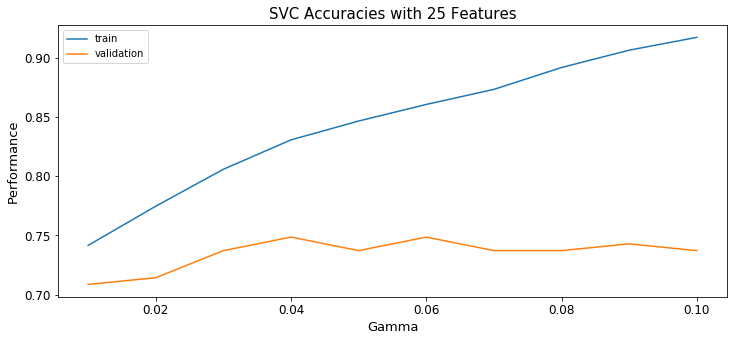

In [599]:
plt.figure(figsize=(12,5))

plt.plot(df['gamma'],df['train_accuracies'],label='train')
plt.plot(df['gamma'],df['validation_accuracies'],label='validation')
plt.xlabel('Gamma',fontsize=13)
plt.ylabel('Performance',fontsize=13)
plt.title('SVC Accuracies with 25 Features',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.show()

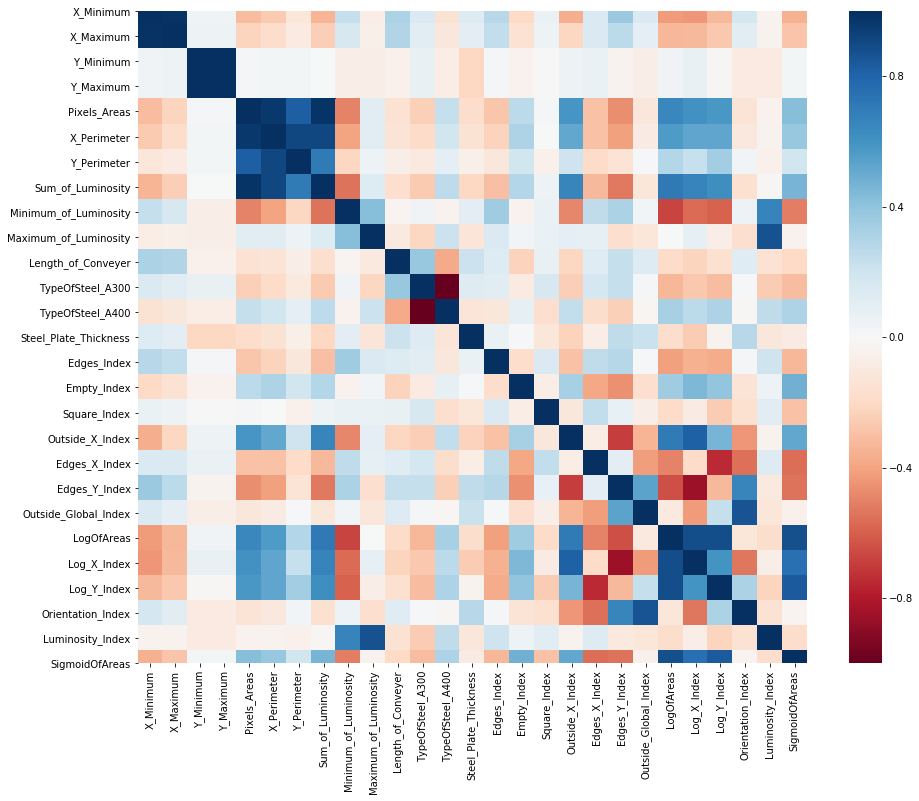

In [614]:
plt.figure(figsize=(15,12))
sns.heatmap(X.corr(),cmap='RdBu')

In [617]:
X_scaled

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,-1.016481,-1.141639,-0.777729,-0.777729,-0.314852,-0.314996,-0.091389,-0.355537,-0.266099,-1.187708,1.576303,1.223956,-1.223956,0.022920,-0.940864,-1.258531,-1.435364,-0.486227,-0.575331,0.796401,0.879804,-0.083538,-0.898437,0.528872,1.467656,-1.075752,-0.009490
1,0.141894,0.066403,0.500188,0.500171,-0.345623,-0.338242,-0.124225,-0.380574,-0.017079,-0.384975,1.576303,1.223956,-1.223956,0.022920,1.445043,-0.254349,-1.342740,-0.504888,-0.043290,0.654223,0.879804,-0.581936,-1.157841,0.130174,1.417530,-0.297824,-0.845759
2,0.495362,0.436253,-0.054546,-0.054566,-0.352784,-0.344883,-0.150024,-0.387261,0.449832,-0.277944,1.133521,1.223956,-1.223956,0.386082,2.133548,-0.521791,-0.876299,-0.503191,0.573451,0.571820,0.879804,-0.812814,-1.157841,-0.325764,1.165103,0.057185,-1.091513
3,0.541467,0.486504,-0.722225,-0.722225,-0.332463,-0.328279,-0.089044,-0.365736,0.449832,-0.224429,-0.734467,-0.817023,0.817023,3.836121,1.324897,0.197460,-1.532047,-0.477744,-0.296153,0.796401,0.879804,-0.313021,-1.018897,0.550227,1.519978,-0.171419,-0.189237
4,1.379032,1.382988,-0.649678,-0.649559,0.099692,-0.172201,0.415209,0.079307,-1.480069,-0.224429,-0.734467,-0.817023,0.817023,1.929520,-0.875117,0.250657,-1.861950,-0.352206,-1.345434,0.747301,0.879804,1.127655,-0.218461,2.216130,1.698514,-0.456503,1.221636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,-0.618830,-0.685357,-0.746795,-0.746811,-0.313690,-0.192126,-0.142987,-0.334424,1.072381,0.578304,-0.686037,-0.817023,0.817023,-0.703404,0.115090,-0.172003,0.002335,-0.216488,-0.378385,-0.367922,-1.193905,-0.071239,0.231603,-0.438483,-1.022264,0.900332,0.412476
1937,-0.820537,-0.890382,-0.738452,-0.738468,-0.310981,-0.225334,-0.138297,-0.335271,0.854489,0.150180,-0.686037,-0.817023,0.817023,-0.703404,-0.400205,0.300210,-0.082539,-0.179166,0.386784,-0.449045,-1.193905,-0.043727,0.323402,-0.380362,-1.068196,0.491534,0.683276
1938,-0.818616,-0.892392,-0.712412,-0.712430,-0.310013,-0.238617,-0.142987,-0.329467,1.103509,0.524788,-0.686037,-0.817023,0.817023,-0.703404,-0.395533,-0.623084,-0.197673,-0.204613,0.470661,-0.562189,-1.193905,-0.034218,0.263172,-0.500126,-1.130504,0.917814,0.360909
1939,-0.833984,-0.900432,-0.692280,-0.692288,-0.285435,-0.049331,-0.084353,-0.299900,1.010126,0.524788,-0.686037,-0.817023,0.817023,-0.703404,-0.434580,1.283988,1.360326,-0.153719,-1.111484,-0.656975,-1.193905,0.164584,0.379686,0.194019,-0.287351,0.767876,1.197767


In [634]:
remove_feat = ['Log_Y_Index','Outside_Global_Index','X_Minimum','Y_Maximum','TypeOfSteel_A300',
               'Maximum_of_Luminosity','Pixels_Areas']
X_pruned = X_scaled.drop(labels=remove_feat,axis=1)
X_pruned_train, X_pruned_test, y_train_pruned, y_test_pruned = train_test_split(X_pruned,y,test_size=0.1)
X_pruned_train, X_pruned_val, y_train_pruned, y_val_pruned = train_test_split(X_pruned_train,y_train_pruned,test_size=0.1)

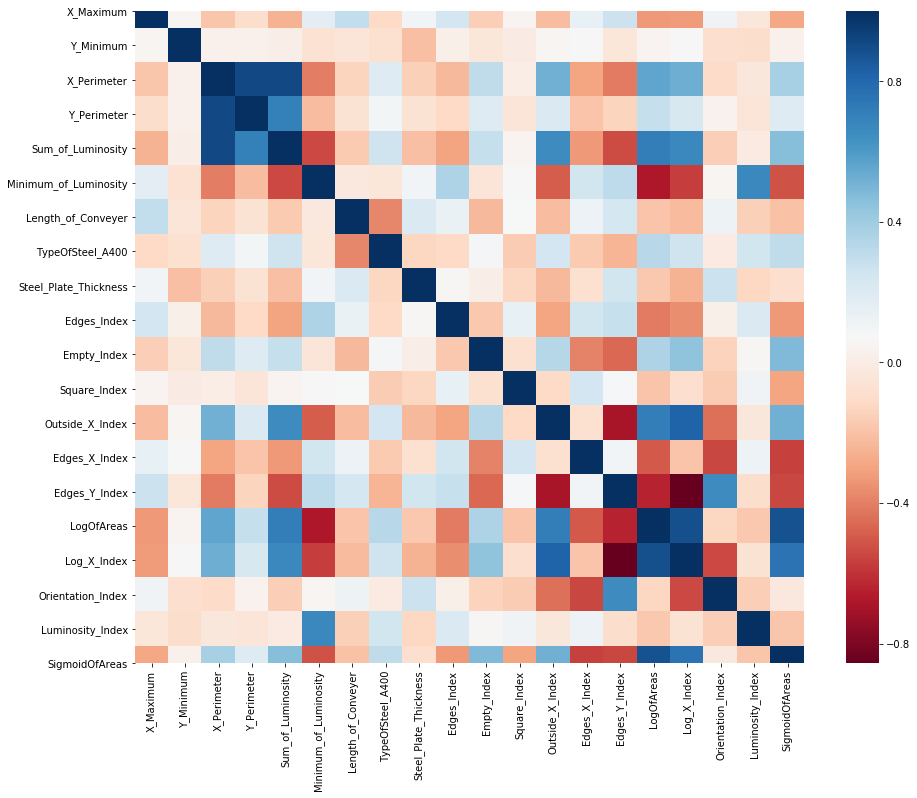

In [619]:
plt.figure(figsize=(15,12))
sns.heatmap(X_pruned.corr(),cmap='RdBu')

In [622]:
train_classifiers(ClassifierChain(LogisticRegression(solver='liblinear',penalty='l1'))
                  , X_pruned_train, X_pruned_test, y_train_pruned, y_test_pruned,
                 label='test')

ClassifierChain(classifier=LogisticRegression(C=1.0, class_weight=None,
                                              dual=False, fit_intercept=True,
                                              intercept_scaling=1,
                                              l1_ratio=None, max_iter=100,
                                              multi_class='auto', n_jobs=None,
                                              penalty='l1', random_state=None,
                                              solver='liblinear', tol=0.0001,
                                              verbose=0, warm_start=False),
                order=None, require_dense=[True, True]) train accuracy: 0.7216494845360825, f1_score: 0.7220886293369977
ClassifierChain(classifier=LogisticRegression(C=1.0, class_weight=None,
                                              dual=False, fit_intercept=True,
                                              intercept_scaling=1,
                                              l1_ratio=Non

In [637]:
poly = PolynomialFeatures(degree=2,interaction_only= True)
poly_train_prune_scaled = poly.fit_transform(X_pruned_train)
poly_val_prune_scaled = poly.transform(X_pruned_val)
poly_test_prune_scaled = poly.transform(X_pruned_test)


for c in np.arange(0.1,1,0.1):
    print('C = ',c)
    lgreg = ClassifierChain(LogisticRegression(solver='liblinear',penalty='l1',C = c))
    lgreg.fit(poly_train_prune_scaled,y_train_pruned)
    pred = lgreg.predict(poly_train_prune_scaled)
    pred_test = lgreg.predict(poly_val_prune_scaled)
    print('Train accuracy: {}, F1: {}'.format(accuracy_score(y_train_pruned,pred),
                                              f1_score(y_train_pruned,pred,average='micro')))
    print('Validation accuracy: {}, F1: {}'.format(accuracy_score(y_val_pruned,pred_test),
                                             f1_score(y_val_pruned,pred_test,average='micro')))
    print('\n')

C =  0.1
Train accuracy: 0.7568427753023552, F1: 0.7572383073496659
Validation accuracy: 0.6628571428571428, F1: 0.6628571428571428


C =  0.2
Train accuracy: 0.7803946530872056, F1: 0.7811704834605598
Validation accuracy: 0.68, F1: 0.6837606837606837


C =  0.30000000000000004
Train accuracy: 0.7886696371737747, F1: 0.7890550429525931
Validation accuracy: 0.7028571428571428, F1: 0.7028571428571428


C =  0.4
Train accuracy: 0.7943984723106302, F1: 0.7943984723106302
Validation accuracy: 0.6914285714285714, F1: 0.6914285714285714


C =  0.5
Train accuracy: 0.800763844684914, F1: 0.800763844684914
Validation accuracy: 0.6914285714285714, F1: 0.6914285714285714


C =  0.6
Train accuracy: 0.8052196053469128, F1: 0.8052196053469128
Validation accuracy: 0.6857142857142857, F1: 0.6857142857142857


C =  0.7000000000000001
Train accuracy: 0.8115849777211966, F1: 0.8115849777211966
Validation accuracy: 0.6971428571428572, F1: 0.6971428571428572


C =  0.8
Train accuracy: 0.8115849777211966, F1

In [638]:
for c in np.arange(0.3,0.4,0.01):
    print('C = ',c)
    lgreg = ClassifierChain(LogisticRegression(solver='liblinear',penalty='l1',C = c))
    lgreg.fit(poly_train_prune_scaled,y_train_pruned)
    pred = lgreg.predict(poly_train_prune_scaled)
    pred_test = lgreg.predict(poly_val_prune_scaled)
    print('Train accuracy: {}, F1: {}'.format(accuracy_score(y_train_pruned,pred),
                                              f1_score(y_train_pruned,pred,average='micro')))
    print('Validation accuracy: {}, F1: {}'.format(accuracy_score(y_val_pruned,pred_test),
                                             f1_score(y_val_pruned,pred_test,average='micro')))
    print('\n')

C =  0.3
Train accuracy: 0.7893061744112031, F1: 0.7896913776646516
Validation accuracy: 0.7028571428571428, F1: 0.7028571428571428


C =  0.31
Train accuracy: 0.7899427116486314, F1: 0.7899427116486314
Validation accuracy: 0.7028571428571428, F1: 0.7028571428571428


C =  0.32
Train accuracy: 0.7918523233609166, F1: 0.7918523233609166
Validation accuracy: 0.7028571428571428, F1: 0.7028571428571428


C =  0.33
Train accuracy: 0.7912157861234882, F1: 0.7912157861234882
Validation accuracy: 0.7028571428571428, F1: 0.7028571428571428


C =  0.34
Train accuracy: 0.792488860598345, F1: 0.792488860598345
Validation accuracy: 0.6971428571428572, F1: 0.6971428571428572


C =  0.35000000000000003
Train accuracy: 0.7937619350732018, F1: 0.7937619350732018
Validation accuracy: 0.6857142857142857, F1: 0.6857142857142857


C =  0.36000000000000004
Train accuracy: 0.7931253978357734, F1: 0.7931253978357735
Validation accuracy: 0.6857142857142857, F1: 0.6857142857142857


C =  0.37000000000000005
Tra

In [642]:
lgreg = ClassifierChain(LogisticRegression(solver='liblinear',penalty='l1',C = 0.3))
lgreg.fit(poly_train_prune_scaled,y_train_pruned)
pred = lgreg.predict(poly_train_prune_scaled)
pred_test = lgreg.predict(poly_test_prune_scaled)
print('Train accuracy: {}, F1: {}'.format(accuracy_score(y_train_pruned,pred),
                                          f1_score(y_train_pruned,pred,average='micro')))
print('Test accuracy: {}, F1: {}'.format(accuracy_score(y_test_pruned,pred_test),
                                         f1_score(y_test_pruned,pred_test,average='micro')))

Train accuracy: 0.7886696371737747, F1: 0.7890550429525931
Test accuracy: 0.7076923076923077, F1: 0.7076923076923077


In [708]:
result_dict['Model'].append('LogisticRegression')
result_dict['Method'].append('ClassifierChain')
result_dict['Processing'].append('Standard Scaled, Reduced Features and tuned')
result_dict['Data'].append('Train')
result_dict['Accuracy'].append(0.7886696371737747)
result_dict['F1_score'].append(0.7890550429525931)

result_dict['Model'].append('LogisticRegression')
result_dict['Method'].append('ClassifierChain')
result_dict['Processing'].append('Standard Scaled, Reduced Features and tuned')
result_dict['Data'].append('Test')
result_dict['Accuracy'].append(0.7076923076923077)
result_dict['F1_score'].append(0.7076923076923077)

In [654]:
lgreg = ClassifierChain(SVC(C=31))
lgreg.fit(poly_train_prune_scaled,y_train_pruned)
pred = lgreg.predict(poly_train_prune_scaled)
pred_test = lgreg.predict(poly_test_prune_scaled)
print('Train accuracy: {}, F1: {}'.format(accuracy_score(y_train_pruned,pred),
                                          f1_score(y_train_pruned,pred,average='micro')))
print('Test accuracy: {}, F1: {}'.format(accuracy_score(y_test_pruned,pred_test),
                                         f1_score(y_test_pruned,pred_test,average='micro')))

Train accuracy: 0.7956715467854869, F1: 0.7966857871255576
Test accuracy: 0.7282051282051282, F1: 0.7352185089974292


In [681]:
result_dict['Model'].append('SVC')
result_dict['Method'].append('ClassifierChain')
result_dict['Processing'].append('Standard Scaled and Reduced Features')
result_dict['Data'].append('Train')
result_dict['Accuracy'].append(0.7956715467854869)
result_dict['F1_score'].append(0.7966857871255576)

result_dict['Model'].append('SVC')
result_dict['Method'].append('ClassifierChain')
result_dict['Processing'].append('Standard Scaled and Reduced Features')
result_dict['Data'].append('Test')
result_dict['Accuracy'].append(0.7282051282051282)
result_dict['F1_score'].append(0.7352185089974292)

In [662]:
for samp in range(3,16,2):
    print('samples: ',samp)
    lgreg = ClassifierChain(RandomForestClassifier(min_samples_split=samp))
    lgreg.fit(poly_train_prune_scaled,y_train_pruned)
    pred = lgreg.predict(poly_train_prune_scaled)
    pred_test = lgreg.predict(poly_val_prune_scaled)
    print('Train accuracy: {}, F1: {}'.format(accuracy_score(y_train_pruned,pred),
                                              f1_score(y_train_pruned,pred,average='micro')))
    print('Validation accuracy: {}, F1: {}'.format(accuracy_score(y_val_pruned,pred_test),
                                             f1_score(y_val_pruned,pred_test,average='micro')))
    print('\n')

samples:  3
Train accuracy: 0.9993634627625716, F1: 0.9993634627625716
Validation accuracy: 0.68, F1: 0.7104477611940299


samples:  5
Train accuracy: 0.9910884786760026, F1: 0.9952061361457335
Validation accuracy: 0.6628571428571428, F1: 0.6966966966966968


samples:  7
Train accuracy: 0.98026734563972, F1: 0.986863184876642
Validation accuracy: 0.7028571428571428, F1: 0.7299703264094957


samples:  9
Train accuracy: 0.9681731381285805, F1: 0.9800257731958762
Validation accuracy: 0.6857142857142857, F1: 0.718562874251497


samples:  11
Train accuracy: 0.9503500954805856, F1: 0.9682230869001296
Validation accuracy: 0.68, F1: 0.7083333333333334


samples:  13
Train accuracy: 0.9369828134945895, F1: 0.9543245869776482
Validation accuracy: 0.6914285714285714, F1: 0.7055393586005831


samples:  15
Train accuracy: 0.9210693825588797, F1: 0.9408322496749025
Validation accuracy: 0.68, F1: 0.7020648967551621




In [665]:
lgreg = ClassifierChain(RandomForestClassifier(min_samples_split=7))
lgreg.fit(poly_train_prune_scaled,y_train_pruned)
pred = lgreg.predict(poly_train_prune_scaled)
pred_test = lgreg.predict(poly_test_prune_scaled)
print('Train accuracy: {}, F1: {}'.format(accuracy_score(y_train_pruned,pred),
                                          f1_score(y_train_pruned,pred,average='micro')))
print('Test accuracy: {}, F1: {}'.format(accuracy_score(y_test_pruned,pred_test),
                                         f1_score(y_test_pruned,pred_test,average='micro')))

Train accuracy: 0.982176957352005, F1: 0.9891025641025641
Test accuracy: 0.7589743589743589, F1: 0.7914438502673796


In [682]:
result_dict['Model'].append('RandomForest')
result_dict['Method'].append('ClassifierChain')
result_dict['Processing'].append('Standard Scaled, Reduced Features and tuned')
result_dict['Data'].append('Train')
result_dict['Accuracy'].append(0.982176957352005)
result_dict['F1_score'].append(0.9891025641025641)

result_dict['Model'].append('RandomForest')
result_dict['Method'].append('ClassifierChain')
result_dict['Processing'].append('Standard Scaled, Reduced Features and tuned')
result_dict['Data'].append('Test')
result_dict['Accuracy'].append(0.7589743589743589)
result_dict['F1_score'].append(0.7914438502673796)

In [709]:
results = pd.DataFrame(result_dict)
results

,Model,Method,Processing,Data,Accuracy,F1_score
0,SVC,BinaryRelevance,None,Train,0.136483,0.236364
1,SVC,BinaryRelevance,None,Test,0.184615,0.307692
2,SVC,BinaryRelevance,Standard Scaler,Train,0.671821,0.761658
3,SVC,BinaryRelevance,Standard Scaler,Test,0.646154,0.738372
4,SVC,BinaryRelevance,"Scaled, PCA and tuned",Train,0.775939,0.835943
5,SVC,BinaryRelevance,"Scaled, PCA and tuned",Test,0.661538,0.718663
6,RandomForest,ClassifierChain,None,Train,1.000000,1.000000
7,RandomForest,ClassifierChain,None,Test,0.774359,0.774359
8,RandomForest,ClassifierChain,PCA,Train,0.825589,0.825852
9,RandomForest,ClassifierChain,PCA,Test,0.702564,0.704370


In [726]:
new_result = pd.merge(results[results['Data']=='Train'],results[results['Data']=='Test'],on=['Model','Method','Processing'],suffixes=('_train','_test'))
new_result = new_result.drop(labels=['Data_train','Data_test'],axis=1)
new_result['Model'] = new_result['Model'] + '_'+new_result['Method']
new_result.drop(labels=['Method'],axis=1,inplace=True)
new_result = new_result.sort_values(by='Accuracy_test',ascending=False)
new_result.drop(labels=[3,12],inplace=True)
new_result.reset_index(drop=True)

,Model,Processing,Accuracy_train,F1_score_train,Accuracy_test,F1_score_test
0,LogisticRegression_ClassifierChain,"Interactions, scaled",0.838956,0.838956,0.758974,0.762148
1,SVC_ClassifierChain,Scaling and PCA,0.828771,0.829299,0.753846,0.755784
2,SVC_ClassifierChain,Standard Scaled and Reduced Features,0.795672,0.796686,0.728205,0.735219
3,RandomForest_ClassifierChain,PCA and tuned,0.860598,0.862058,0.723077,0.728205
4,LogisticRegression_ClassifierChain,"Standard Scaled, Reduced Features and tuned",0.788670,0.789055,0.707692,0.707692
5,RandomForest_ClassifierChain,PCA,0.825589,0.825852,0.702564,0.704370
6,MultiLabel-KNN_Algorithm Adaption,"Standard Scaling, PCA and Tuned",0.774029,0.815973,0.692308,0.721485
7,MultiLabel-KNN_Algorithm Adaption,Standard Scaled and Tuned,0.745385,0.794649,0.676923,0.737127
8,SVC_BinaryRelevance,"Scaled, PCA and tuned",0.775939,0.835943,0.661538,0.718663
9,SVC_BinaryRelevance,Standard Scaler,0.671821,0.761658,0.646154,0.738372


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

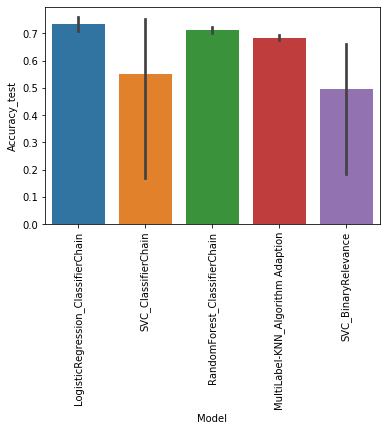

In [728]:
sns.barplot(new_result['Model'],new_result['Accuracy_test'])
plt.xticks(rotation = 90)

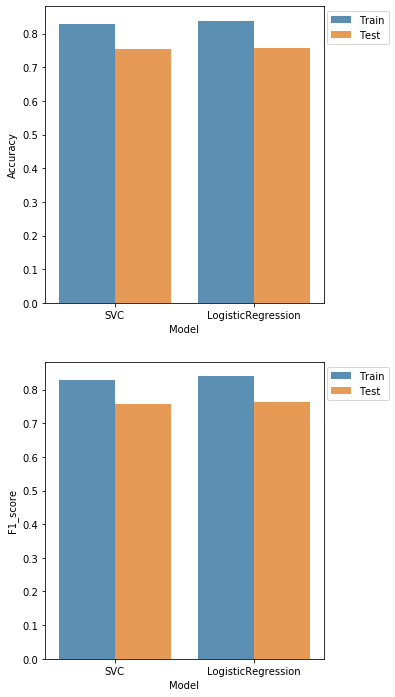

In [770]:
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(5,12))
axs = axs.flatten()
ax = sns.barplot(data = results.loc[(14,15,20,21),:], x = 'Model', y = 'Accuracy', hue = 'Data',alpha=0.8,ax = axs[0])
axs[0].legend(bbox_to_anchor=(1.25,1), loc="upper right")

sns.barplot(data = results.loc[(14,15,20,21),:], x = 'Model', y = 'F1_score', hue = 'Data',alpha=0.8,ax = axs[1])
axs[1].legend(bbox_to_anchor=(1.25,1), loc="upper right")




In [781]:
new_result.loc[(10,7),:].reset_index(drop=True)

,Model,Processing,Accuracy_train,F1_score_train,Accuracy_test,F1_score_test
0,LogisticRegression_ClassifierChain,"Interactions, scaled",0.838956,0.838956,0.758974,0.762148
1,SVC_ClassifierChain,Scaling and PCA,0.828771,0.829299,0.753846,0.755784
